In [5]:
import pandas as pd
import numpy as np

# Carregar o arquivo Excel
xls = pd.ExcelFile('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx')

# Obter os nomes das abas
sheet_names = xls.sheet_names

# Para cada aba, ler o schema e as primeiras 10 linhas
# for sheet in sheet_names:
#     df = pd.read_excel(xls, sheet_name=sheet, nrows=10)
#     print(f"Schema para {sheet}:")
#     print(df.dtypes)
#     print(f"Primeiras 10 linhas para {sheet}:")
#     print(df.head(10))

In [6]:
import openpyxl

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de transações
ws = wb['Transações']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_t = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_t.columns:
    # Se o tipo de dados da coluna é object (string)
    if df_t[col].dtype == 'object':
        # Remova os espaços em branco no início e no final
        df_t[col] = df_t[col].str.strip()

In [7]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Trans          7791 non-null   int64         
 1   Data              7791 non-null   datetime64[ns]
 2   ID_Loja           7791 non-null   int64         
 3   ID_Produto        7791 non-null   int64         
 4   ID_Cliente        7791 non-null   int64         
 5   UnidadesVendidas  7791 non-null   int64         
 6   ValorTotal        7791 non-null   float64       
 7   Promo             7775 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 487.1 KB


In [8]:
df_t['Promo'] = df_t['Promo'].astype(str)

In [9]:
df_t.head()

ID_Trans       Data  ID_Loja  ID_Produto  ID_Cliente  UnidadesVendidas  \
0         1 2022-01-01        7      123005       90023                 2   
1         2 2022-01-01        9      123004       90092                 1   
2         3 2022-01-01        1      123001       90027                 2   
3         4 2022-01-01        3      123001       90097                 2   
4         5 2022-01-01        4      123004       90089                 2   

   ValorTotal Promo  
0       99.98   0.0  
1       35.99   0.0  
2       51.98   0.0  
3       51.98   0.0  
4       71.98   0.0

In [10]:
df_t['Data'].min(), df_t['Data'].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2023-09-30 00:00:00'))

In [11]:
# Filtrando colunas que não contêm 'ID' no nome
cols = [col for col in df_t.columns if 'ID' not in col]

# Descrevendo apenas essas colunas
df_t[cols].describe()

Data  UnidadesVendidas   ValorTotal
count                           7791       7791.000000  7791.000000
mean   2022-11-19 08:33:16.149403392          2.302657   114.133276
min              2022-01-01 00:00:00          1.000000    16.990000
25%              2022-05-08 00:00:00          2.000000    55.990000
50%              2023-01-01 00:00:00          2.000000    89.990000
75%              2023-06-02 00:00:00          3.000000   161.973000
max              2023-09-30 00:00:00          4.000000   367.960000
std                              NaN          0.892296    72.627427

In [12]:
# verificando valores nulos
null_counts = df_t.isnull().sum()
print(null_counts)

ID_Trans            0
Data                0
ID_Loja             0
ID_Produto          0
ID_Cliente          0
UnidadesVendidas    0
ValorTotal          0
Promo               0
dtype: int64


In [13]:
# verificando valores duplicados

for column in df_t.columns:
    print(f"\nColumn: {column}")
    print(df_t[column].value_counts(dropna=False))


Column: ID_Trans
ID_Trans
1       1
5175    1
5203    1
5202    1
5201    1
       ..
2593    1
2592    1
2591    1
2590    1
7791    1
Name: count, Length: 7791, dtype: int64

Column: Data
Data
2022-03-17    88
2022-04-27    84
2022-05-14    82
2023-03-11    77
2022-03-09    75
              ..
2022-07-14     1
2022-07-13     1
2023-08-02     1
2023-06-11     1
2022-05-23     1
Name: count, Length: 546, dtype: int64

Column: ID_Loja
ID_Loja
3     927
9     903
2     884
4     862
7     853
6     842
8     837
5     813
10    437
1     433
Name: count, dtype: int64

Column: ID_Produto
ID_Produto
123004    850
123005    842
123003    828
123002    824
123008    822
123006    806
123007    795
123001    639
123009    592
123010    380
123000    228
123011    185
Name: count, dtype: int64

Column: ID_Cliente
ID_Cliente
90016    100
90096     99
90083     99
90011     98
90089     96
        ... 
90042     58
90010     57
90020     50
90000     39
90099     32
Name: count, Length: 100, dt

##### Primeira parte da análise:
- análise descritiva da base de Transações
- agregação Ano e Mês
- KPI Ticket Médio
###### nesta primeira parte da análise é possível verificar que:
- a base apenas possui dados para 01-2022 até 09-2022 e depois 01-2023 até 09-2023 faltando o último trimestre dos dois anos; época de Natal!
- as vendas de 2023 apenas se recuperaram no terceiro trimestre
- o ano de 2023 teve menos promoções e menos Unidades vendidas em relação a 2022, porém obteve um Valor Total maior indicando que houve um Ticket Médio maior em 2023 em relação a 2022
- o Ticket Médio de 2023 foi sempre maior que 2022 no agregado mês a mês
 

In [14]:
import plotly.graph_objects as go

# Agrupando os dados por data
grouped = df_t.groupby('Data').sum()

# Criando o gráfico de barras para 'ValorTotal'
bar1 = go.Bar(x=grouped.index, y=grouped['ValorTotal'], name='ValorTotal')

# Criando outro gráfico de barras para 'UnidadesVendidas'
bar2 = go.Bar(x=grouped.index, y=grouped['UnidadesVendidas'], name='UnidadesVendidas', yaxis='y2')

# Criando a figura e adicionando os gráficos
fig = go.Figure(data=[bar1, bar2])

# Configurando os eixos
fig.update_layout(
    yaxis=dict(title='ValorTotal'),
    yaxis2=dict(title='UnidadesVendidas', overlaying='y', side='right')
)

fig.show()

In [16]:
import seaborn as sns

# Data to datetime
df_t['Data'] = pd.to_datetime(df_t['Data'])

# Criando colunas para o mês e o ano
df_t['Year'] = df_t['Data'].dt.year
df_t['Month'] = df_t['Data'].dt.month

# Agrupando os dados por ano e mês
grouped = df_t.groupby(['Year', 'Month'])[['ValorTotal', 'UnidadesVendidas']].sum().reset_index()

# Obtendo as cores da paleta "Pastel2"
colors = sns.color_palette("Pastel2", len(grouped['Year'].unique())).as_hex()

# Criando o gráfico de barras para 'ValorTotal'
fig = go.Figure()

for i, year in enumerate(grouped['Year'].unique()):
    fig.add_trace(go.Bar(x=grouped[grouped['Year'] == year]['Month'], 
                         y=grouped[grouped['Year'] == year]['ValorTotal'], 
                         name=str(year),
                         marker_color=colors[i]))  # Aplicando as cores

# Configurando os eixos
fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='ValorTotal'),
)

fig.show()

In [18]:
# Definindo a paleta de cores Pastel2
pastel2 = ['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']

# Criando colunas para o mês e o ano
df_t['Year'] = df_t['Data'].dt.year
df_t['Month'] = df_t['Data'].dt.month

# Agrupando os dados por ano e mês
grouped = df_t.groupby(['Year', 'Month'])[['ValorTotal', 'UnidadesVendidas']].sum().reset_index()

# Criando a figura
fig = go.Figure()

# Adicionando o gráfico de barras para 'ValorTotal'
for i, year in enumerate(grouped['Year'].unique()):
    fig.add_trace(go.Bar(x=grouped[grouped['Year'] == year]['Month'], 
                         y=grouped[grouped['Year'] == year]['ValorTotal'], 
                         name='ValorTotal ' + str(year),
                         marker_color=pastel2[i % len(pastel2)]))  # Use a cor correspondente da paleta

# Adicionando o gráfico de linha para 'UnidadesVendidas'
for i, year in enumerate(grouped['Year'].unique()):
    line_color = '#ff0000' if year == 2023 else pastel2[(i + len(pastel2) // 2) % len(pastel2)]  # Use a cor vermelha para 2023
    fig.add_trace(go.Scatter(x=grouped[grouped['Year'] == year]['Month'], 
                             y=grouped[grouped['Year'] == year]['UnidadesVendidas'], 
                             name='UnidadesVendidas ' + str(year), 
                             yaxis='y2',
                             line_color=line_color))

# Configurando os eixos e a legenda
fig.update_layout(
    title={
        'text': "Unidades Vendidas e Valor Total por Mês e Ano",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    xaxis=dict(title='Month'),
    yaxis=dict(title='ValorTotal'),
    yaxis2=dict(title='UnidadesVendidas', overlaying='y', side='right'),
    autosize=False,
    width=900,  # Diminui a largura do gráfico em 10%
    legend=dict(
        x=1.1,  # Posiciona a legenda mais para a direita
        y=1,  # Posiciona a legenda no topo
        bgcolor='rgba(255, 255, 255, 0)',  # Fundo transparente para a legenda
        bordercolor='rgba(255, 255, 255, 0)'  # Borda transparente para a legenda
    )
)

fig.show()

In [19]:
# Preenchendo os valores nulos na coluna 'Promo' com 0
df_t['Promo'] = df_t['Promo'].fillna(0)

# Convertendo a coluna 'Promo' para float, substituindo NaNs por 0 e depois convertendo para inteiro
df_t['Promo'] = np.nan_to_num(df_t['Promo'].astype(float)).astype(int)

# Filtrando os dados para os anos de 2022 e 2023
df_t['Year'] = df_t['Data'].dt.year
df_t['Month'] = df_t['Data'].dt.month
df_filtered = df_t[df_t['Year'].isin([2022, 2023])]

# Criando a tabela agregada
pivot = df_filtered.pivot_table(index='Month', columns='Year', values=['ValorTotal', 'UnidadesVendidas', 'Promo'], aggfunc='sum')

# Adicionando a linha com o valor total
pivot.loc['Total'] = pivot.sum()

pivot

Promo        UnidadesVendidas          ValorTotal             
Year    2022   2023             2022    2023        2022         2023
Month                                                                
1       39.0   17.0           1014.0   829.0   48038.830   42374.9645
2       31.0   28.0            725.0   744.0   33487.866   37752.1970
3       62.0   25.0           1455.0  1023.0   67337.112   54805.5775
4       37.0   15.0           1034.0   886.0   48180.612   45134.3005
5       45.0   20.0           1077.0   914.0   51761.596   46058.3785
6       26.0   16.0            715.0  1213.0   33658.754   64254.3245
7       48.0   23.0           1044.0  1079.0   48442.970   58027.6275
8       59.0   23.0           1126.0   968.0   50768.534   53043.2705
9       35.0   28.0            848.0  1246.0   40119.278   65966.1620
Total  382.0  195.0           9038.0  8902.0  421795.552  467416.8025

In [20]:
# Extraindo a linha 'Total'
total_values = pivot.loc['Total']

# Transpondo a série para um DataFrame e resetando o índice
total_df = total_values.transpose().reset_index()

# Renomeando as colunas
total_df.columns = ['Category', 'Year', 'Value']

# Pivotando o DataFrame
pivot_total = total_df.pivot(index='Category', columns='Year', values='Value')

# Calculando a mudança percentual
pivot_total['Change (%)'] = (pivot_total[2023] - pivot_total[2022]) / pivot_total[2022] * 100

pivot_total

Year                    2022         2023  Change (%)
Category                                             
Promo                382.000     195.0000  -48.952880
UnidadesVendidas    9038.000    8902.0000   -1.504758
ValorTotal        421795.552  467416.8025   10.815963

In [21]:
# o ano de 2023 teve menos promoções 
# e menos Unidades vendidas em relação a 2022, 
# porém obteve um Valor Total maior 
# indicando que houve um Ticket Médio maior em 2023 em relação a 2022

In [22]:
# Calculando o Ticket Médio para cada ano
pivot_total['Ticket Médio 2022'] = pivot_total[2022]['ValorTotal'] / pivot_total[2022]['UnidadesVendidas']
pivot_total['Ticket Médio 2023'] = pivot_total[2023]['ValorTotal'] / pivot_total[2023]['UnidadesVendidas']

# Exibindo o DataFrame
pivot_total

Year                    2022         2023  Change (%)  Ticket Médio 2022  \
Category                                                                   
Promo                382.000     195.0000  -48.952880          46.669125   
UnidadesVendidas    9038.000    8902.0000   -1.504758          46.669125   
ValorTotal        421795.552  467416.8025   10.815963          46.669125   

Year              Ticket Médio 2023  
Category                             
Promo                     52.506943  
UnidadesVendidas          52.506943  
ValorTotal                52.506943

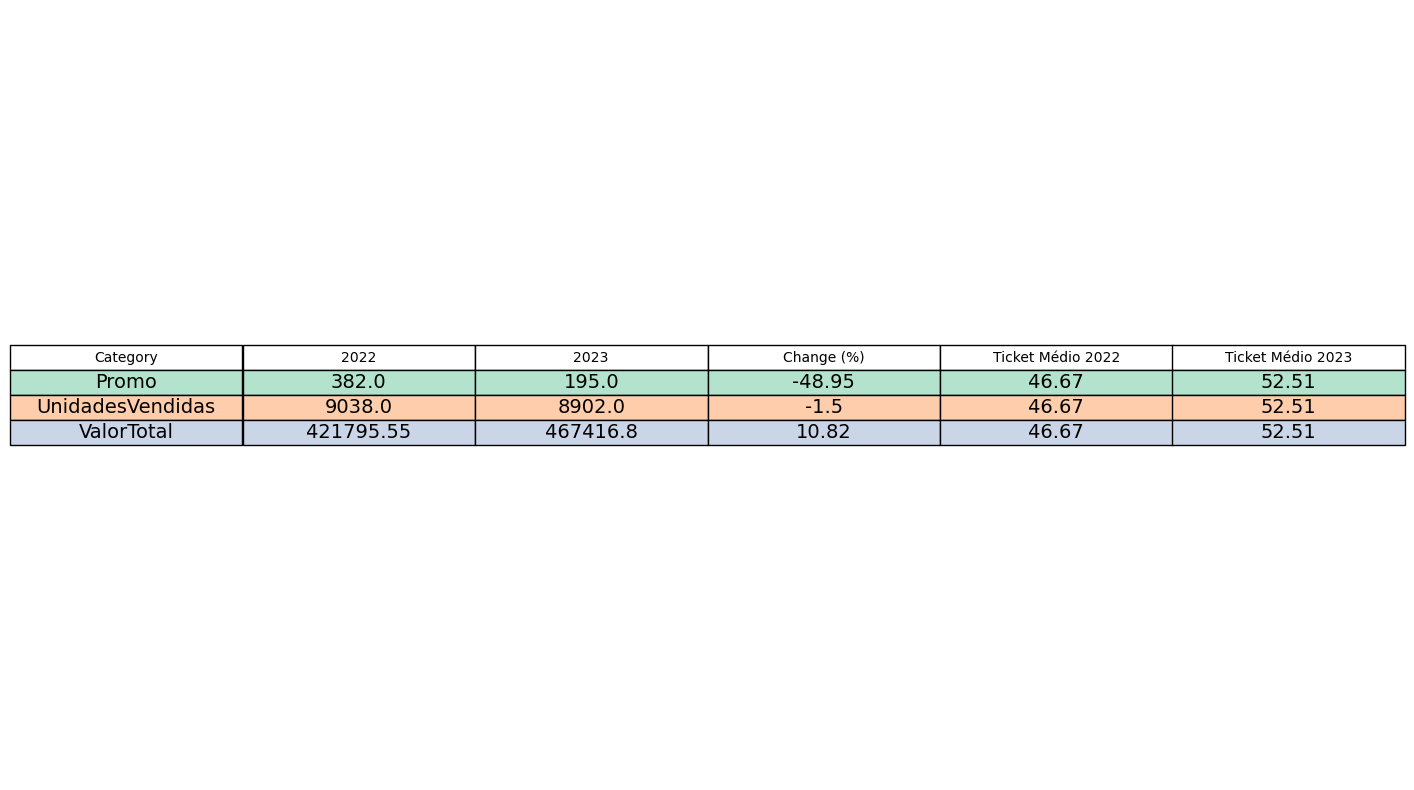

In [23]:
import matplotlib.pyplot as plt

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 10))  # Aumentando a largura da figura

# Adicionando a tabela à figura
table_data = pivot_total.reset_index().round(2).values.tolist()  # Arredondando os valores para 2 casas decimais
column_labels = pivot_total.reset_index().columns.tolist()

# Definindo as cores
colors = sns.color_palette("Pastel2").as_hex()

# Criando uma matriz de cores
cell_colors = [[colors[i%len(colors)] for _ in row] for i, row in enumerate(table_data)]

# Adicionando a tabela à figura
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Ajustando o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(14)

# Ajustando o tamanho da fonte dos cabeçalhos
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(10)

# Ajustando a largura das colunas e a altura das linhas
table.scale(1.2, 1.5)  # Aumentando a largura das colunas e a altura das linhas

# Escondendo os eixos
ax.axis('off')

# Salvando a figura como .png
plt.savefig('pivot_total_table.png')

In [24]:
# Calculate 'Ticket Médio' for 2022 and 2023
pivot[('Ticket Médio', 2022)] = pivot[('ValorTotal', 2022)] / pivot[('UnidadesVendidas', 2022)]
pivot[('Ticket Médio', 2023)] = pivot[('ValorTotal', 2023)] / pivot[('UnidadesVendidas', 2023)]

# Display the updated DataFrame
pivot

Promo        UnidadesVendidas          ValorTotal               \
Year    2022   2023             2022    2023        2022         2023   
Month                                                                   
1       39.0   17.0           1014.0   829.0   48038.830   42374.9645   
2       31.0   28.0            725.0   744.0   33487.866   37752.1970   
3       62.0   25.0           1455.0  1023.0   67337.112   54805.5775   
4       37.0   15.0           1034.0   886.0   48180.612   45134.3005   
5       45.0   20.0           1077.0   914.0   51761.596   46058.3785   
6       26.0   16.0            715.0  1213.0   33658.754   64254.3245   
7       48.0   23.0           1044.0  1079.0   48442.970   58027.6275   
8       59.0   23.0           1126.0   968.0   50768.534   53043.2705   
9       35.0   28.0            848.0  1246.0   40119.278   65966.1620   
Total  382.0  195.0           9038.0  8902.0  421795.552  467416.8025   

      Ticket Médio             
Year          2022       2023  
Month                          
1        47.375572  51.115759  
2        46.190160  50.742200  
3        46.279802  53.573390  
4        46.596337  50.941648  
5        48.060906  50.392099  
6        47.075180  52.971413  
7        46.401312  53.779080  
8        45.087508  54.796767  
9        47.310469  52.942345  
Total    46.669125  52.506943

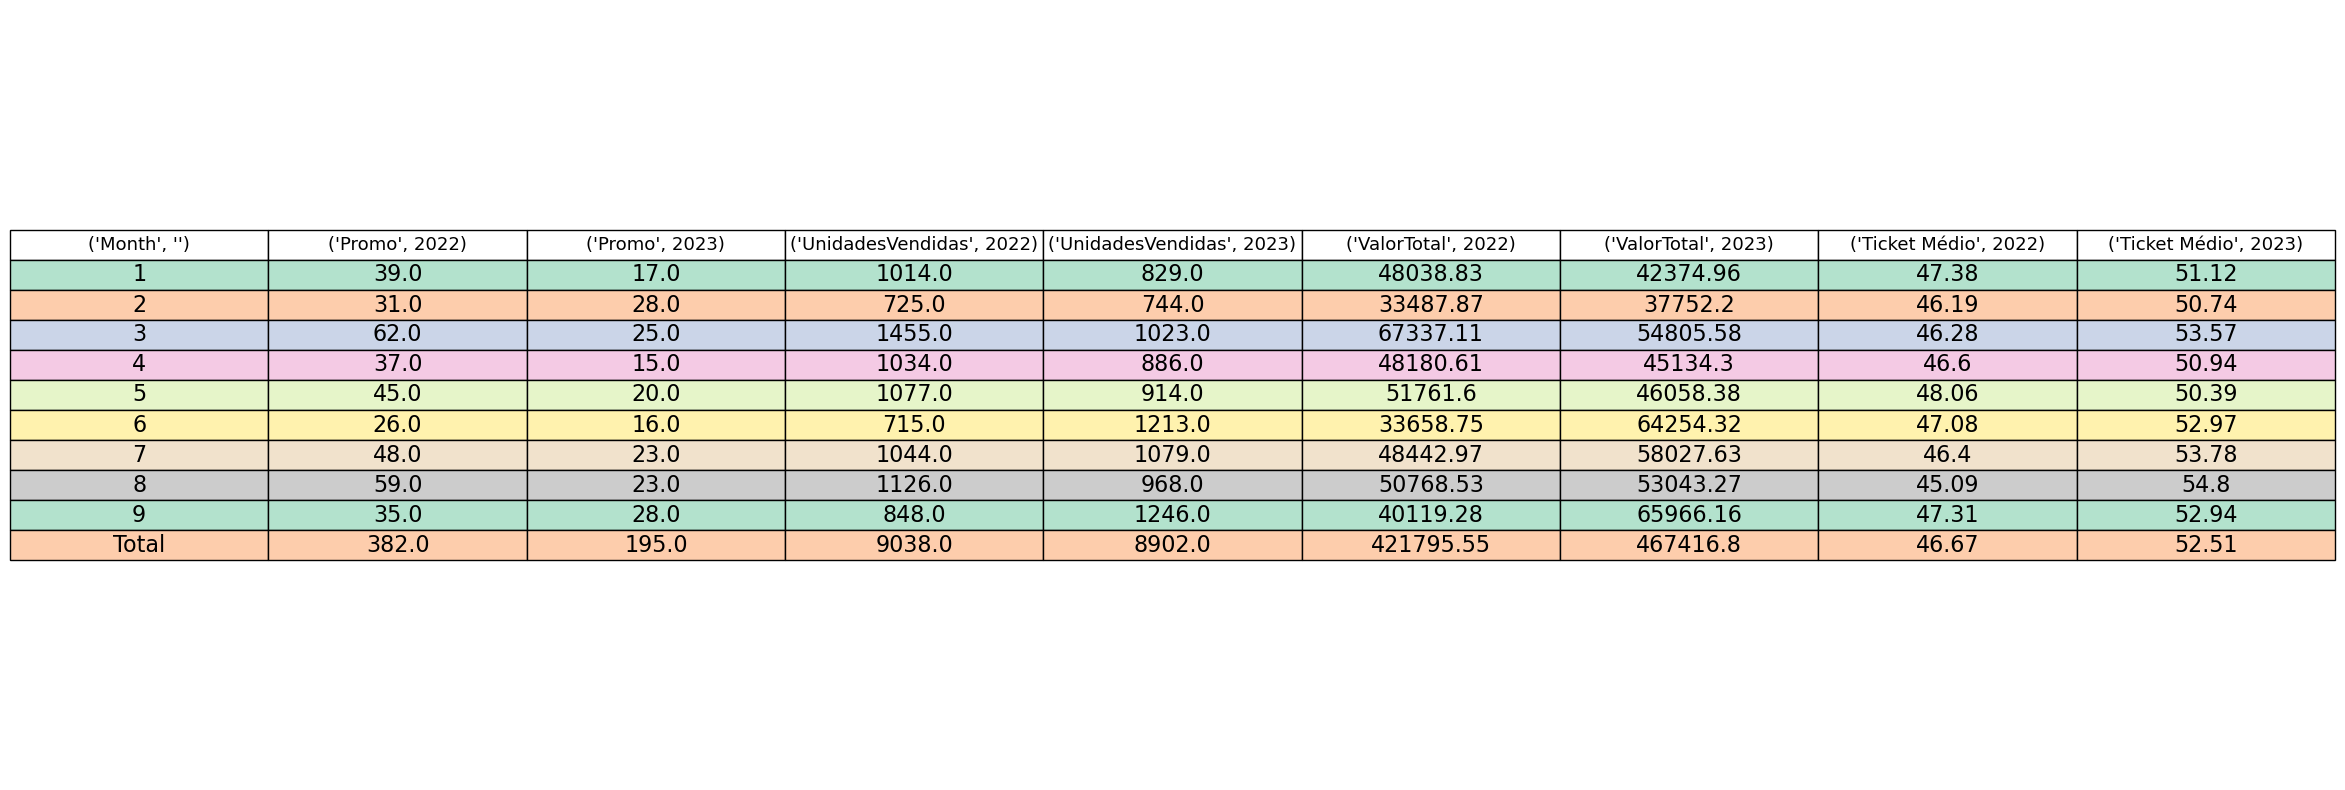

In [25]:

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 10))  # Aumentando a largura da figura

# Adicionando a tabela à figura
table_data = pivot.reset_index().round(2).values.tolist()  # Arredondando os valores para 2 casas decimais
column_labels = pivot.reset_index().columns.tolist()

# Definindo as cores
colors = sns.color_palette("Pastel2").as_hex()

# Criando uma matriz de cores
cell_colors = [[colors[i%len(colors)] for _ in row] for i, row in enumerate(table_data)]

# Adicionando a tabela à figura
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Ajustando o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(16)

# Ajustando o tamanho da fonte dos cabeçalhos
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(13)

# Ajustando a largura das colunas e a altura das linhas
table.scale(2, 1.8)  # Aumentando a largura das colunas e a altura das linhas

# Escondendo os eixos
ax.axis('off')

# Salvando a figura como .png
plt.savefig('pivot_table_with_ticket_medio.png')

In [26]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define a list of colors
colors = ['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']

# Calcular o Ticket Médio
df_t['Ticket Médio'] = df_t['ValorTotal'] / df_t['UnidadesVendidas']

# Agrupar os dados e calcular a média
df_grouped = df_t.groupby(['Year', 'Month']).agg({'UnidadesVendidas': 'sum', 'ValorTotal': 'sum', 'Promo': 'sum', 'Ticket Médio': 'mean'}).reset_index()

# Obter o número de colunas
num_cols = len(df_grouped.columns) - 2  # Subtrair as colunas 'Year' e 'Month'

# Calcular o número de linhas e colunas para os subplots
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1

# Criar subplots
fig = make_subplots(rows=num_rows, cols=2, subplot_titles=df_grouped.columns[2:])

# Adicionar traços
for i, header in enumerate(df_grouped.columns[2:]):
    row = i // 2 + 1
    col = i % 2 + 1
    for j, year in enumerate(df_grouped['Year'].unique()):
        df_year = df_grouped[df_grouped['Year'] == year]
        fig.add_trace(go.Scatter(x=df_year['Month'], y=df_year[header], mode='lines', name=f'{header} {year}', line=dict(color=colors[j % len(colors)])), row=row, col=col)

# Atualizar layout
fig.update_layout(height=600, width=800, title_text="Subplots")
fig.show()

#### Segunda parte da análise:
- explorando os dados de transações com as Marcas e suas categorias

##### nesta segunda parte da análise é possível verificar que:

###### O top vermelho gammaz - teve ótimo desempenho,
###### - ficou em segundo lugar no rank de Ticket Médio (TM) no ano de 2023. Caiu 1 posição em relação a 2022
###### - se manteve em primeiro em relação a Unidades Vendidas e Valor Total (VT) 2022 e 2023
###### - fez menos promoções em 2023 em relação a 2022 - caiu de sexto em quantidade de promoções para sétimo
###### mas o Botton azul Gammaz também teve destaque!

###### 2023	Bottom Azul Marca GammaZ  ->	TM - 88.517723	 VT - 75759.52
###### 2023	Top Vermelho Marca GammaZ ->	TM - 83.774699	 VT - 146329.22

###### O Botton azul gammaz que não foi vendido em 2022 teve um desempenho melhor em 2023 quando se olha pra Ticket Médio.

###### A Marca Gammaz no geral teve um bom desempenho pra Ticket Médio e Valor Total, ultrapassando em Valor Total a Marca AlfaX
 
###### As promoções não impulsionaram o negócio de forma geral

###### Cores vermelhas são representativas em vendas, mas um destaque foram peças azuis, que melhoraram tanto em quantidade vendida, quanto em aumento de ticket médio e valor Total

###### Houve crescimento de Ticket médio de peças tipo Botton e também Valor Total, o que ajuda a explicar o sucesso do Botton azul gammaz


In [27]:
# O top vermelho gammaz - teve ótimo desempenho, mas o Botton azul Gammaz também teve destaque
# - ficou em segundo lugar no rank de Ticket Médio no ano de 2023. Caiu 1 posição em relação a 2022
# - se manteve em primeiro em relação a Unidades Vendidas e Valor Total 2022 e 2023
# - fez menos promoções em 2023 em relação a 2022 - caiu de sexto em quantidade de promoções para sétimo

# 2023	Bottom Azul Marca GammaZ	TM - 88.517723	VT - 75759.52
# 2023	Top Vermelho Marca GammaZ	TM - 83.774699	VT - 146329.22

# O Botton azul gammaz que não foi vendido em 2022 teve um desempenho melhor em 2023 quando se olha pra Ticket Médio.

# A Marca Gammaz no geral teve um bom desempenho pra Ticket Médio e Valor Total, ultrapassando em Valor Total a Marca AlfaX
 
# As promoções não impulsionaram o negócio de forma geral

# Cores vermelhas são representativas em vendas, mas um destaque foram peças azuis que melhoraram tanto em quantidade vendida quanto em aumento de ticket médio e valor Total

# Houve crescimento de Ticket médio de peças tipo Botton e também Valor Total, o que ajuda a explicar o sucesso do Botton azul gammaz

In [28]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de produto
ws = wb['Produto']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_p = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_p.columns:
    # Se o tipo de dados da coluna é object (string)
    if df_p[col].dtype == 'object':
        # Remova os espaços em branco no início e no final  
        df_p[col] = df_p[col].str.strip()

In [29]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID_Produto         12 non-null     int64 
 1   Descrição Produto  12 non-null     object
 2   Categoria          12 non-null     object
 3   Cor                12 non-null     object
 4   Marca              12 non-null     object
dtypes: int64(1), object(4)
memory usage: 612.0+ bytes


In [30]:
# verificando valores nulos
null_counts = df_p.isnull().sum()
print(null_counts)


ID_Produto           0
Descrição Produto    0
Categoria            0
Cor                  0
Marca                0
dtype: int64


In [31]:
# verificando valores duplicados

for column in df_p.columns:
    print(f"\nColumn: {column}")
    print(df_p[column].value_counts(dropna=False))



Column: ID_Produto
ID_Produto
123000    1
123001    1
123002    1
123003    1
123004    1
123005    1
123006    1
123007    1
123008    1
123009    1
123010    1
123011    1
Name: count, dtype: int64

Column: Descrição Produto
Descrição Produto
Top Marca GammaZ            2
Bottom Azul Marca AlfaX     1
Top Cinza Marca GammaZ      1
Bottom Preto Marca BetaY    1
Top Marca BetaY             1
Top Cinza Marca BetaY       1
Top Cinza Marca AlfaX       1
Bottom Preto Marca AlfaX    1
Top Marca AlfaX             1
Bottom GammaZ               1
Bottom BetaY                1
Name: count, dtype: int64

Column: Categoria
Categoria
Top       7
Bottom    5
Name: count, dtype: int64

Column: Cor
Cor
Vermelho    4
Azul        3
Cinza       3
Preto       2
Name: count, dtype: int64

Column: Marca
Marca
AlfaX     4
GammaZ    4
BetaY     4
Name: count, dtype: int64


In [32]:
df_p

ID_Produto         Descrição Produto Categoria       Cor   Marca
0       123000   Bottom Azul Marca AlfaX    Bottom      Azul   AlfaX
1       123001    Top Cinza Marca GammaZ       Top     Cinza  GammaZ
2       123002  Bottom Preto Marca BetaY    Bottom     Preto   BetaY
3       123003           Top Marca BetaY       Top  Vermelho   BetaY
4       123004     Top Cinza Marca BetaY       Top     Cinza   BetaY
5       123005     Top Cinza Marca AlfaX       Top     Cinza   AlfaX
6       123006  Bottom Preto Marca AlfaX    Bottom     Preto   AlfaX
7       123007           Top Marca AlfaX       Top  Vermelho   AlfaX
8       123008          Top Marca GammaZ       Top  Vermelho  GammaZ
9       123009          Top Marca GammaZ       Top  Vermelho  GammaZ
10      123010             Bottom GammaZ    Bottom      Azul  GammaZ
11      123011              Bottom BetaY    Bottom      Azul   BetaY

In [33]:
def update_description(row):
    if row['Categoria'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Categoria'] + ' ' + row['Descrição Produto']
    if row['Cor'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Categoria'], row['Categoria'] + ' ' + row['Cor'])
    if 'Marca' not in row['Descrição Produto'] and row['Marca'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Marca'], 'Marca ' + row['Marca'])
    return row

df_p = df_p.apply(update_description, axis=1)

df_p.loc[df_p['ID_Produto'] == 123010, 'Descrição Produto'] = 'Bottom Azul Marca GammaZ'
df_p.loc[df_p['ID_Produto'] == 123011, 'Descrição Produto'] = 'Bottom Azul Marca BetaY'

In [34]:
df_p

ID_Produto          Descrição Produto Categoria       Cor   Marca
0       123000    Bottom Azul Marca AlfaX    Bottom      Azul   AlfaX
1       123001     Top Cinza Marca GammaZ       Top     Cinza  GammaZ
2       123002   Bottom Preto Marca BetaY    Bottom     Preto   BetaY
3       123003   Top Vermelho Marca BetaY       Top  Vermelho   BetaY
4       123004      Top Cinza Marca BetaY       Top     Cinza   BetaY
5       123005      Top Cinza Marca AlfaX       Top     Cinza   AlfaX
6       123006   Bottom Preto Marca AlfaX    Bottom     Preto   AlfaX
7       123007   Top Vermelho Marca AlfaX       Top  Vermelho   AlfaX
8       123008  Top Vermelho Marca GammaZ       Top  Vermelho  GammaZ
9       123009  Top Vermelho Marca GammaZ       Top  Vermelho  GammaZ
10      123010   Bottom Azul Marca GammaZ    Bottom      Azul  GammaZ
11      123011    Bottom Azul Marca BetaY    Bottom      Azul   BetaY

In [35]:
df_t['ID_Produto'].value_counts(dropna=False)

ID_Produto
123004    850
123005    842
123003    828
123002    824
123008    822
123006    806
123007    795
123001    639
123009    592
123010    380
123000    228
123011    185
Name: count, dtype: int64

In [36]:
df_p['ID_Produto'].value_counts(dropna=False)

ID_Produto
123000    1
123001    1
123002    1
123003    1
123004    1
123005    1
123006    1
123007    1
123008    1
123009    1
123010    1
123011    1
Name: count, dtype: int64

In [37]:
#left join
df_tp = pd.merge(df_t, df_p, on='ID_Produto', how='left')

In [38]:
df_tp.head()

ID_Trans       Data  ID_Loja  ID_Produto  ID_Cliente  UnidadesVendidas  \
0         1 2022-01-01        7      123005       90023                 2   
1         2 2022-01-01        9      123004       90092                 1   
2         3 2022-01-01        1      123001       90027                 2   
3         4 2022-01-01        3      123001       90097                 2   
4         5 2022-01-01        4      123004       90089                 2   

   ValorTotal  Promo  Year  Month  Ticket Médio       Descrição Produto  \
0       99.98      0  2022      1         49.99   Top Cinza Marca AlfaX   
1       35.99      0  2022      1         35.99   Top Cinza Marca BetaY   
2       51.98      0  2022      1         25.99  Top Cinza Marca GammaZ   
3       51.98      0  2022      1         25.99  Top Cinza Marca GammaZ   
4       71.98      0  2022      1         35.99   Top Cinza Marca BetaY   

  Categoria    Cor   Marca  
0       Top  Cinza   AlfaX  
1       Top  Cinza   BetaY  
2       Top  Cinza  GammaZ  
3       Top  Cinza  GammaZ  
4       Top  Cinza   BetaY

In [39]:
# liberando memória
del df_t

In [40]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Trans           7791 non-null   int64         
 1   Data               7791 non-null   datetime64[ns]
 2   ID_Loja            7791 non-null   int64         
 3   ID_Produto         7791 non-null   int64         
 4   ID_Cliente         7791 non-null   int64         
 5   UnidadesVendidas   7791 non-null   int64         
 6   ValorTotal         7791 non-null   float64       
 7   Promo              7791 non-null   int32         
 8   Year               7791 non-null   int32         
 9   Month              7791 non-null   int32         
 10  Ticket Médio       7791 non-null   float64       
 11  Descrição Produto  7791 non-null   object        
 12  Categoria          7791 non-null   object        
 13  Cor                7791 non-null   object        
 14  Marca   

In [41]:
# Drop unnecessary columns
df_tp_drp = df_tp.drop(columns=['ID_Trans', 'Data', 'ID_Loja', 'ID_Produto', 'ID_Cliente', 'Month'])

# Group by 'Descrição Produto', 'Categoria', 'Cor', 'Marca', and 'Year' and calculate the mean of 'Ticket Médio' and the sum of 'UnidadesVendidas', 'ValorTotal', and 'Promo'
grouped_df = df_tp_drp.groupby(['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Year']).agg({'Ticket Médio': 'mean', 'UnidadesVendidas': 'sum', 'ValorTotal': 'sum', 'Promo': 'sum'}).reset_index()

grouped_df

Descrição Produto Categoria       Cor   Marca  Year  Ticket Médio  \
0     Bottom Azul Marca AlfaX    Bottom      Azul   AlfaX  2022     19.845445   
1     Bottom Azul Marca BetaY    Bottom      Azul   BetaY  2023     19.763070   
2    Bottom Azul Marca GammaZ    Bottom      Azul  GammaZ  2023     88.517723   
3    Bottom Preto Marca AlfaX    Bottom     Preto   AlfaX  2022     55.165527   
4    Bottom Preto Marca AlfaX    Bottom     Preto   AlfaX  2023     54.385049   
5    Bottom Preto Marca BetaY    Bottom     Preto   BetaY  2022     27.667022   
6    Bottom Preto Marca BetaY    Bottom     Preto   BetaY  2023     27.845801   
7       Top Cinza Marca AlfaX       Top     Cinza   AlfaX  2022     49.136522   
8       Top Cinza Marca AlfaX       Top     Cinza   AlfaX  2023     42.473845   
9       Top Cinza Marca BetaY       Top     Cinza   BetaY  2022     35.473874   
10      Top Cinza Marca BetaY       Top     Cinza   BetaY  2023     35.661356   
11     Top Cinza Marca GammaZ       Top     Cinza  GammaZ  2022     25.926545   
12     Top Cinza Marca GammaZ       Top     Cinza  GammaZ  2023     24.851804   
13   Top Vermelho Marca AlfaX       Top  Vermelho   AlfaX  2022     58.892622   
14   Top Vermelho Marca AlfaX       Top  Vermelho   AlfaX  2023     59.345082   
15   Top Vermelho Marca BetaY       Top  Vermelho   BetaY  2022     27.469110   
16   Top Vermelho Marca BetaY       Top  Vermelho   BetaY  2023     30.761997   
17  Top Vermelho Marca GammaZ       Top  Vermelho  GammaZ  2022     89.344289   
18  Top Vermelho Marca GammaZ       Top  Vermelho  GammaZ  2023     83.774699   

    UnidadesVendidas   ValorTotal  Promo  
0                531   10528.7830      0  
1                419    8270.8580      0  
2                857   75759.5210     14  
3                985   54301.4730     56  
4                870   47305.1560     24  
5               1023   28352.3420     66  
6                903   25165.8615     27  
7                968   47560.4940      0  
8                943   40015.9045     35  
9               1041   36928.5670     70  
10               929   33147.6245     28  
11               984   25364.7560     74  
12               455   11289.7375     20  
13               980   57740.3750      0  
14               887   52698.2030      1  
15              1045   28709.3430     82  
16               891   27434.7070     30  
17              1481  132309.4190     34  
18              1748  146329.2295     16

In [42]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Descrição Produto  19 non-null     object 
 1   Categoria          19 non-null     object 
 2   Cor                19 non-null     object 
 3   Marca              19 non-null     object 
 4   Year               19 non-null     int32  
 5   Ticket Médio       19 non-null     float64
 6   UnidadesVendidas   19 non-null     int64  
 7   ValorTotal         19 non-null     float64
 8   Promo              19 non-null     int32  
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 1.3+ KB


In [43]:
# Filter the DataFrame by year and create two separate DataFrames
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Create a rank of 'UnidadesVendidas' in each DataFrame
df1['Rank_2022_UnidadesVendidas'] = df1['UnidadesVendidas'].rank(ascending=False)
df2['Rank_2023_UnidadesVendidas'] = df2['UnidadesVendidas'].rank(ascending=False)

# Merge the two DataFrames using a full outer join, bringing only the rank columns
rank_UnidadesVendidas = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_UnidadesVendidas']], 
                                 df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_UnidadesVendidas']], 
                                 on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                                 how='outer')

# Sort the DataFrame by 'Rank_2023_UnidadesVendidas'
rank_UnidadesVendidas = rank_UnidadesVendidas.sort_values('Rank_2023_UnidadesVendidas')

rank_UnidadesVendidas

Descrição Produto Categoria       Cor   Marca  \
8   Top Vermelho Marca GammaZ       Top  Vermelho  GammaZ   
3       Top Cinza Marca AlfaX       Top     Cinza   AlfaX   
4       Top Cinza Marca BetaY       Top     Cinza   BetaY   
2    Bottom Preto Marca BetaY    Bottom     Preto   BetaY   
7    Top Vermelho Marca BetaY       Top  Vermelho   BetaY   
6    Top Vermelho Marca AlfaX       Top  Vermelho   AlfaX   
1    Bottom Preto Marca AlfaX    Bottom     Preto   AlfaX   
10   Bottom Azul Marca GammaZ    Bottom      Azul  GammaZ   
5      Top Cinza Marca GammaZ       Top     Cinza  GammaZ   
9     Bottom Azul Marca BetaY    Bottom      Azul   BetaY   
0     Bottom Azul Marca AlfaX    Bottom      Azul   AlfaX   

    Rank_2022_UnidadesVendidas  Rank_2023_UnidadesVendidas  
8                          1.0                         1.0  
3                          8.0                         2.0  
4                          3.0                         3.0  
2                          4.0                         4.0  
7                          2.0                         5.0  
6                          7.0                         6.0  
1                          5.0                         7.0  
10                         NaN                         8.0  
5                          6.0                         9.0  
9                          NaN                        10.0  
0                          9.0                         NaN

In [44]:
# Filter the DataFrame by year and create two separate DataFrames
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Create a rank of 'ValorTotal' in each DataFrame
df1['Rank_2022_ValorTotal'] = df1['ValorTotal'].rank(ascending=False)
df2['Rank_2023_ValorTotal'] = df2['ValorTotal'].rank(ascending=False)

# Merge the two DataFrames using a full outer join, bringing only the rank columns
rank_ValorTotal = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_ValorTotal']], 
                           df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_ValorTotal']], 
                           on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                           how='outer')

# Sort the DataFrame by 'Rank_2023_ValorTotal'
rank_ValorTotal = rank_ValorTotal.sort_values('Rank_2023_ValorTotal')

rank_ValorTotal

Descrição Produto Categoria       Cor   Marca  \
8   Top Vermelho Marca GammaZ       Top  Vermelho  GammaZ   
10   Bottom Azul Marca GammaZ    Bottom      Azul  GammaZ   
6    Top Vermelho Marca AlfaX       Top  Vermelho   AlfaX   
1    Bottom Preto Marca AlfaX    Bottom     Preto   AlfaX   
3       Top Cinza Marca AlfaX       Top     Cinza   AlfaX   
4       Top Cinza Marca BetaY       Top     Cinza   BetaY   
7    Top Vermelho Marca BetaY       Top  Vermelho   BetaY   
2    Bottom Preto Marca BetaY    Bottom     Preto   BetaY   
5      Top Cinza Marca GammaZ       Top     Cinza  GammaZ   
9     Bottom Azul Marca BetaY    Bottom      Azul   BetaY   
0     Bottom Azul Marca AlfaX    Bottom      Azul   AlfaX   

    Rank_2022_ValorTotal  Rank_2023_ValorTotal  
8                    1.0                   1.0  
10                   NaN                   2.0  
6                    2.0                   3.0  
1                    3.0                   4.0  
3                    4.0                   5.0  
4                    5.0                   6.0  
7                    6.0                   7.0  
2                    7.0                   8.0  
5                    8.0                   9.0  
9                    NaN                  10.0  
0                    9.0                   NaN

In [45]:
# Filter the DataFrame by year and create two separate DataFrames
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Create a rank of 'Promo' in each DataFrame
df1['Rank_2022_Promo'] = df1['Promo'].rank(ascending=False)
df2['Rank_2023_Promo'] = df2['Promo'].rank(ascending=False)

# Merge the two DataFrames using a full outer join, bringing only the rank columns
rank_Promo = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_Promo']], 
                      df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_Promo']], 
                      on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                      how='outer')

# Sort the DataFrame by 'Rank_2023_Promo'
rank_Promo = rank_Promo.sort_values('Rank_2023_Promo')

rank_Promo

Descrição Produto Categoria       Cor   Marca  Rank_2022_Promo  \
3       Top Cinza Marca AlfaX       Top     Cinza   AlfaX              8.0   
7    Top Vermelho Marca BetaY       Top  Vermelho   BetaY              1.0   
4       Top Cinza Marca BetaY       Top     Cinza   BetaY              3.0   
2    Bottom Preto Marca BetaY    Bottom     Preto   BetaY              4.0   
1    Bottom Preto Marca AlfaX    Bottom     Preto   AlfaX              5.0   
5      Top Cinza Marca GammaZ       Top     Cinza  GammaZ              2.0   
8   Top Vermelho Marca GammaZ       Top  Vermelho  GammaZ              6.0   
10   Bottom Azul Marca GammaZ    Bottom      Azul  GammaZ              NaN   
6    Top Vermelho Marca AlfaX       Top  Vermelho   AlfaX              8.0   
9     Bottom Azul Marca BetaY    Bottom      Azul   BetaY              NaN   
0     Bottom Azul Marca AlfaX    Bottom      Azul   AlfaX              8.0   

    Rank_2023_Promo  
3               1.0  
7               2.0  
4               3.0  
2               4.0  
1               5.0  
5               6.0  
8               7.0  
10              8.0  
6               9.0  
9              10.0  
0               NaN

In [46]:
# Filter the DataFrame by year and create two separate DataFrames
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Create a rank of 'Ticket Médio' in each DataFrame
df1['Rank_2022_Ticket_Medio'] = df1['Ticket Médio'].rank(ascending=False)
df2['Rank_2023_Ticket_Medio'] = df2['Ticket Médio'].rank(ascending=False)

# Merge the two DataFrames using a full outer join, bringing only the rank columns
rank_Ticket_Medio = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_Ticket_Medio']], 
                             df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_Ticket_Medio']], 
                             on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                             how='outer')

# Sort the DataFrame by 'Rank_2023_Ticket_Medio'
rank_Ticket_Medio = rank_Ticket_Medio.sort_values('Rank_2023_Ticket_Medio')

rank_Ticket_Medio

Descrição Produto Categoria       Cor   Marca  \
10   Bottom Azul Marca GammaZ    Bottom      Azul  GammaZ   
8   Top Vermelho Marca GammaZ       Top  Vermelho  GammaZ   
6    Top Vermelho Marca AlfaX       Top  Vermelho   AlfaX   
1    Bottom Preto Marca AlfaX    Bottom     Preto   AlfaX   
3       Top Cinza Marca AlfaX       Top     Cinza   AlfaX   
4       Top Cinza Marca BetaY       Top     Cinza   BetaY   
7    Top Vermelho Marca BetaY       Top  Vermelho   BetaY   
2    Bottom Preto Marca BetaY    Bottom     Preto   BetaY   
5      Top Cinza Marca GammaZ       Top     Cinza  GammaZ   
9     Bottom Azul Marca BetaY    Bottom      Azul   BetaY   
0     Bottom Azul Marca AlfaX    Bottom      Azul   AlfaX   

    Rank_2022_Ticket_Medio  Rank_2023_Ticket_Medio  
10                     NaN                     1.0  
8                      1.0                     2.0  
6                      2.0                     3.0  
1                      3.0                     4.0  
3                      4.0                     5.0  
4                      5.0                     6.0  
7                      7.0                     7.0  
2                      6.0                     8.0  
5                      8.0                     9.0  
9                      NaN                    10.0  
0                      9.0                     NaN

In [47]:
# Drop 'Categoria' and 'Marca' columns
rank_UnidadesVendidas = rank_UnidadesVendidas.drop(['Categoria', 'Marca','Cor'], axis=1)
rank_ValorTotal = rank_ValorTotal.drop(['Categoria', 'Marca','Cor'], axis=1)
rank_Promo = rank_Promo.drop(['Categoria', 'Marca','Cor'], axis=1)
rank_Ticket_Medio = rank_Ticket_Medio.drop(['Categoria', 'Marca','Cor'], axis=1)

# Merge all DataFrames
merged_df = rank_UnidadesVendidas.merge(rank_ValorTotal, how='outer', on=['Descrição Produto'])
merged_df = merged_df.merge(rank_Promo, how='outer', on=['Descrição Produto'])
merged_df = merged_df.merge(rank_Ticket_Medio, how='outer', on=['Descrição Produto'])

# Sort by 'Rank_2023_Ticket_Medio'
merged_df = merged_df.sort_values(by='Rank_2023_Ticket_Medio')

In [48]:
cols = ['Descrição Produto', 'Rank_2022_Ticket_Medio', 'Rank_2023_Ticket_Medio'] + [col for col in merged_df.columns if col not in ['Descrição Produto', 'Rank_2022_Ticket_Medio', 'Rank_2023_Ticket_Medio']]
merged_df = merged_df[cols]


In [49]:
merged_df.head(4)

Descrição Produto  Rank_2022_Ticket_Medio  Rank_2023_Ticket_Medio  \
7   Bottom Azul Marca GammaZ                     NaN                     1.0   
0  Top Vermelho Marca GammaZ                     1.0                     2.0   
5   Top Vermelho Marca AlfaX                     2.0                     3.0   
6   Bottom Preto Marca AlfaX                     3.0                     4.0   

   Rank_2022_UnidadesVendidas  Rank_2023_UnidadesVendidas  \
7                         NaN                         8.0   
0                         1.0                         1.0   
5                         7.0                         6.0   
6                         5.0                         7.0   

   Rank_2022_ValorTotal  Rank_2023_ValorTotal  Rank_2022_Promo  \
7                   NaN                   2.0              NaN   
0                   1.0                   1.0              6.0   
5                   2.0                   3.0              8.0   
6                   3.0                   4.0              5.0   

   Rank_2023_Promo  
7              8.0  
0              7.0  
5              9.0  
6              5.0

In [50]:
# Define a dictionary for the new column names
new_column_names = {
    'Rank_2022_Ticket_Medio': 'Rank_22_TM',
    'Rank_2023_Ticket_Medio': 'Rank_23_TM',
    'Rank_2022_UnidadesVendidas': 'Rank_22_UV',
    'Rank_2023_UnidadesVendidas': 'Rank_23_UV',
    'Rank_2022_ValorTotal': 'Rank_22_VT',
    'Rank_2023_ValorTotal': 'Rank_23_VT',
    'Rank_2022_Promo': 'Rank_22_Pro',
    'Rank_2023_Promo': 'Rank_23_Pro',
    'Descrição Produto': 'DescProduto'
}

# Rename the columns
merged_df.rename(columns=new_column_names, inplace=True)

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 7 to 10
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DescProduto  11 non-null     object 
 1   Rank_22_TM   9 non-null      float64
 2   Rank_23_TM   10 non-null     float64
 3   Rank_22_UV   9 non-null      float64
 4   Rank_23_UV   10 non-null     float64
 5   Rank_22_VT   9 non-null      float64
 6   Rank_23_VT   10 non-null     float64
 7   Rank_22_Pro  9 non-null      float64
 8   Rank_23_Pro  10 non-null     float64
dtypes: float64(8), object(1)
memory usage: 880.0+ bytes


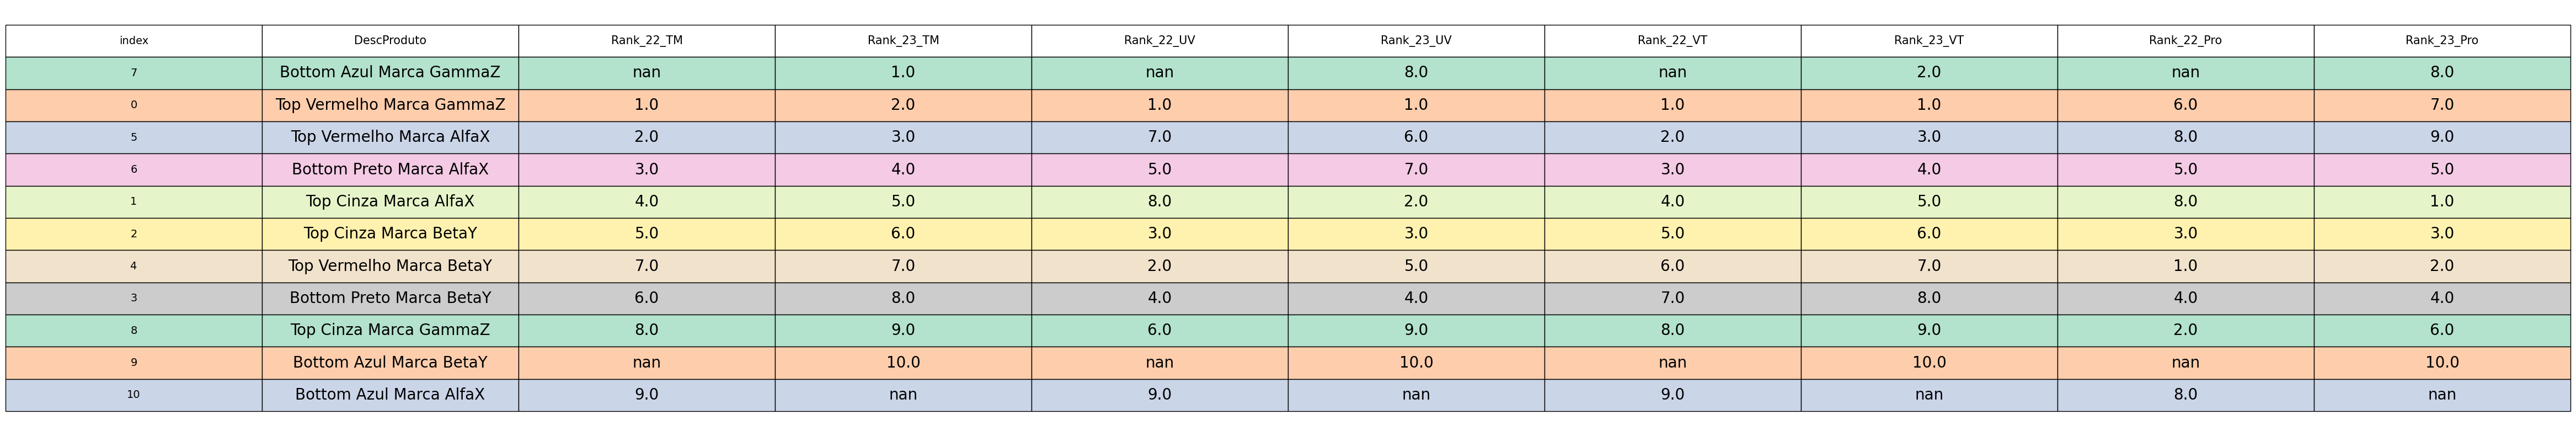

In [52]:
# Defining the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Adding the table to the figure
table_data = merged_df.reset_index().round(2).values.tolist()
column_labels = merged_df.reset_index().columns.tolist()

# Defining the colors
colors = sns.color_palette("Pastel2").as_hex()

# Creating a color matrix
cell_colors = [[colors[i%len(colors)] for _ in row] for i, row in enumerate(table_data)]

# Adding the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Adjusting the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(4, 3.5)  # Increase the first value to increase the width, and the second value to increase the height

# Increase the font size
table.set_fontsize(20)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(15)

# Adjust the font size of 'DescProduto' column
for key, cell in table.get_celld().items():
    if key[1] == 0:  # 0 is the index of 'DescProduto' column
        cell.set_fontsize(14)  # Increase this value to make the text larger
# Hiding the axes
ax.axis('off')

# Saving the figure as .png
plt.savefig('merged_df_table.png')

In [53]:
# Create DataFrame with columns that contain '2022'
df_2022 = merged_df.filter(regex='DesProduto|2022')

# Create DataFrame with columns that contain '2023'
df_2023 = merged_df.filter(regex='DesProduto|2023')

In [54]:
import plotly.figure_factory as ff

# Create DataFrame with columns that contain '22'
df_2022 = merged_df.filter(regex='22')

# Create DataFrame with columns that contain '23'
df_2023 = merged_df.filter(regex='23')

# Create correlation matrices and round to 3 decimal places
correlation_matrix_2022 = df_2022.corr().round(3)
correlation_matrix_2023 = df_2023.corr().round(3)

# Create heatmaps with 'BluGrn' color scale and smaller font size
heatmap_2022 = ff.create_annotated_heatmap(z=correlation_matrix_2022.values, 
                                           x=list(correlation_matrix_2022.columns), 
                                           y=list(correlation_matrix_2022.index), 
                                           colorscale='BluGrn', 
                                           font_colors=['black', 'white'], 
                                           annotation_text=correlation_matrix_2022.values.astype(str))

heatmap_2023 = ff.create_annotated_heatmap(z=correlation_matrix_2023.values, 
                                           x=list(correlation_matrix_2023.columns), 
                                           y=list(correlation_matrix_2023.index), 
                                           colorscale='BluGrn', 
                                           font_colors=['black', 'white'], 
                                           annotation_text=correlation_matrix_2023.values.astype(str))

# Add titles
heatmap_2022.update_layout(title='Heatmap 2022')
heatmap_2023.update_layout(title='Heatmap 2023')

# Decrease the size of the axis labels
heatmap_2022.update_xaxes(tickfont=dict(size=10))
heatmap_2022.update_yaxes(tickfont=dict(size=10))
heatmap_2023.update_xaxes(tickfont=dict(size=10))
heatmap_2023.update_yaxes(tickfont=dict(size=10))

# Display heatmaps
heatmap_2022.show()
heatmap_2023.show()

In [55]:
# Group by 'Year' and 'Marca' and calculate the sum of 'ValorTotal' and the mean of 'Ticket Médio'
df_Marca = df_tp.groupby(['Year', 'Marca']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()

# Display the new DataFrame
print(df_Marca)

   Year   Marca   ValorTotal  Ticket Médio
0  2022   AlfaX  170131.1250     49.049442
1  2022   BetaY   93990.2520     30.261648
2  2022  GammaZ  157674.1750     63.811702
3  2023   AlfaX  140019.2635     51.688359
4  2023   BetaY   94019.0510     29.848488
5  2023  GammaZ  233378.4880     76.131544


In [56]:
# Group by 'Year' and 'Marca' and calculate the sum of 'ValorTotal' and the mean of 'Ticket Médio'
df_Marca_ = df_tp.groupby(['Year', 'Marca']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()


In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 1 row and 2 columns, with titles for spacing
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Define colors for each year
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Get the unique years
years = df_Marca['Year'].unique()

# For each year
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_year = df_Marca[df_Marca['Year'] == year]

    # Create a bar plot for 'Ticket Médio'
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Create a bar plot for 'ValorTotal'
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Marca", row=1, col=1)
fig.update_xaxes(title_text="Marca", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

# Update layout to group bars instead of stacking, increase figure width, and adjust subplot spacing
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Show the figure
fig.show()

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 1 row and 2 columns, with titles for spacing
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Define colors for each year
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Get the unique years
years = df_Marca_['Year'].unique()

# For each year
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_year = df_Marca_[df_Marca_['Year'] == year]

    # Create a bar plot for 'Promo'
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Create a bar plot for 'UnidadesVendidas'
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Marca", row=1, col=1)
fig.update_xaxes(title_text="Marca", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

# Update layout to group bars instead of stacking, increase figure width, and adjust subplot spacing
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Show the figure
fig.show()

In [59]:
# GammaZ tem o maior Ticket Médio em 2022 e 2023 e ultrapasou a marca AlphaX em 2023 em relação ao Valor Total
# As promoções não teem efeito significativo nas vendas de UnidadesVendidas para nenhuma das marcas em 2022 e 2023

In [60]:
# Group by 'Year' and 'Cor' and calculate the sum of 'ValorTotal' and the mean of 'Ticket Médio'
df_Cor = df_tp.groupby(['Year', 'Cor']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()

# Group by 'Year' and 'Cor' and calculate the sum of 'Promo' and 'UnidadesVendidas'
df_Cor_ = df_tp.groupby(['Year', 'Cor']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()


In [61]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 1 row and 2 columns, with titles for spacing
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Define colors for each year
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Get the unique years
years = df_Cor['Year'].unique()

# For each year
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_year = df_Cor[df_Cor['Year'] == year]

    # Create a bar plot for 'Ticket Médio'
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Create a bar plot for 'ValorTotal'
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Cor", row=1, col=1)
fig.update_xaxes(title_text="Cor", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

# Update layout to group bars instead of stacking, increase figure width, and adjust subplot spacing
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Show the figure
fig.show()

In [62]:
# Create a subplot with 1 row and 2 columns, with titles for spacing
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Define colors for each year
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Get the unique years
years = df_Cor_['Year'].unique()

# For each year
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_year = df_Cor_[df_Cor_['Year'] == year]

    # Create a bar plot for 'Promo'
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Create a bar plot for 'UnidadesVendidas'
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Cor", row=1, col=1)
fig.update_xaxes(title_text="Cor", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

# Update layout to group bars instead of stacking, increase figure width, and adjust subplot spacing
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Show the figure
fig.show()

In [63]:
# apenas a cor azul respondeu positivamente a promoções em 2023 em relação a unidades vendidas

In [64]:
# Group by 'Year' and 'Categoria' and calculate the sum of 'ValorTotal' and the mean of 'Ticket Médio'
df_Categoria = df_tp.groupby(['Year', 'Categoria']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()

# Group by 'Year' and 'Categoria' and calculate the sum of 'Promo' and 'UnidadesVendidas'
df_Categoria_ = df_tp.groupby(['Year', 'Categoria']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()


In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 1 row and 2 columns, with titles for spacing
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Define colors for each year
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Get the unique years
years = df_Categoria['Year'].unique()

# For each year
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_year = df_Categoria[df_Categoria['Year'] == year]

    # Create a bar plot for 'Ticket Médio'
    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Create a bar plot for 'ValorTotal'
    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Categoria", row=1, col=1)
fig.update_xaxes(title_text="Categoria", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

# Update layout to group bars instead of stacking, increase figure width, and adjust subplot spacing
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Show the figure
fig.show()

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 1 row and 2 columns, with titles for spacing
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Define colors for each year
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Get the unique years
years = df_Categoria_['Year'].unique()

# For each year
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_year = df_Categoria_[df_Categoria_['Year'] == year]

    # Create a bar plot for 'Promo'
    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Create a bar plot for 'UnidadesVendidas'
    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Categoria", row=1, col=1)
fig.update_xaxes(title_text="Categoria", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

# Update layout to group bars instead of stacking, increase figure width, and adjust subplot spacing
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Show the figure
fig.show()

In [67]:
# Group by 'Year' and 'Descrição Produto' and calculate the sum of 'ValorTotal' and the mean of 'Ticket Médio'
df_Descrição_Produto = df_tp.groupby(['Year', 'Descrição Produto']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()

# Group by 'Year' and 'Descrição Produto' and calculate the sum of 'Promo' and 'UnidadesVendidas'
df_Descrição_Produto_ = df_tp.groupby(['Year', 'Descrição Produto']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()


In [68]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 1 row and 2 columns, with titles for spacing
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Define colors for each year
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Get the unique years
years = df_Descrição_Produto['Year'].unique()

# For each year
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_year = df_Descrição_Produto[df_Descrição_Produto['Year'] == year]

    # Create a bar plot for 'Ticket Médio'
    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Create a bar plot for 'ValorTotal'
    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Descrição Produto", row=1, col=1)
fig.update_xaxes(title_text="Descrição Produto", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

# Update layout to group bars instead of stacking, increase figure width, and adjust subplot spacing
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Show the figure
fig.show()

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 1 row and 2 columns, with titles for spacing
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Define colors for each year
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Get the unique years
years = df_Descrição_Produto_['Year'].unique()

# For each year
for i, year in enumerate(years):
    # Filter the DataFrame for the current year
    df_year = df_Descrição_Produto_[df_Descrição_Produto_['Year'] == year]

    # Create a bar plot for 'Promo'
    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Create a bar plot for 'UnidadesVendidas'
    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Descrição Produto", row=1, col=1)
fig.update_xaxes(title_text="Descrição Produto", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

# Update layout to group bars instead of stacking, increase figure width, and adjust subplot spacing
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Show the figure
fig.show()

C:\Users\surze\AppData\Local\Temp\ipykernel_19352\1770767602.py:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\surze\anaconda3\envs\bds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\surze\AppData\Local\Temp\ipykernel_19352\1770767602.py:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gui

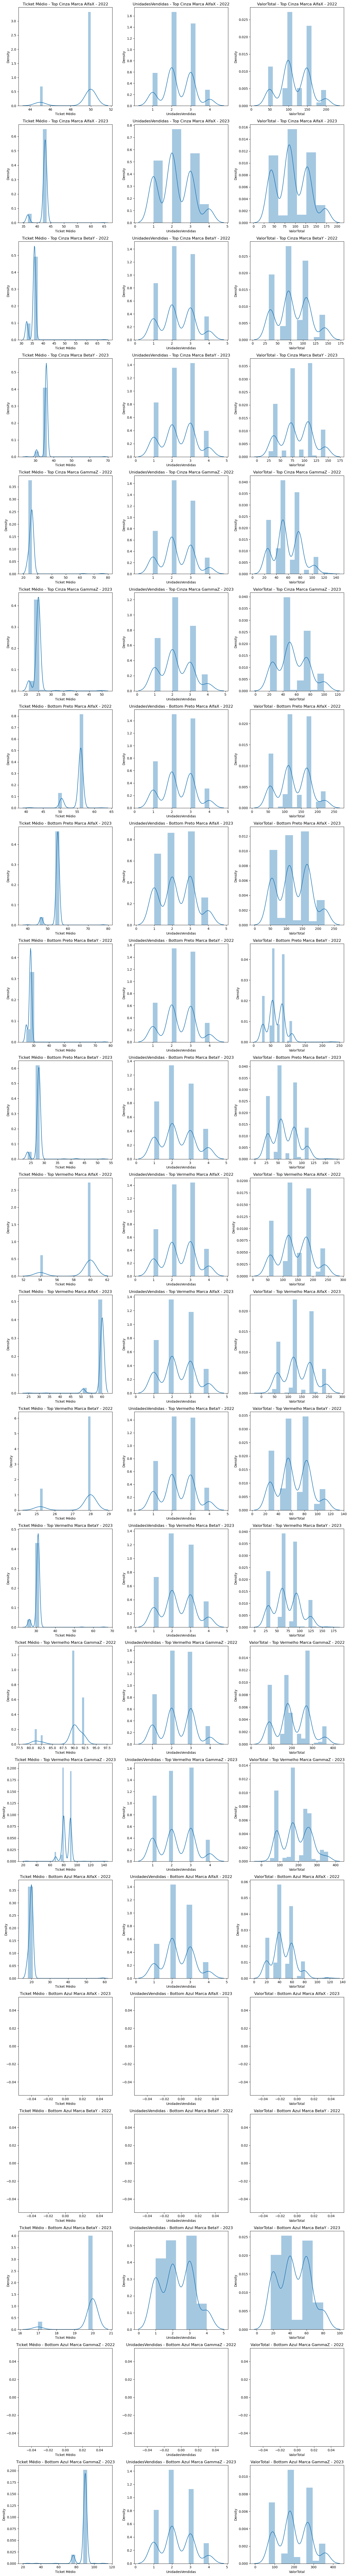

In [70]:
import itertools 
# Get unique products and years
products = df_tp['Descrição Produto'].unique()
years = df_tp['Year'].unique()

# Create subplots
fig, axs = plt.subplots(len(products)*len(years), 3, figsize=(15, 5*len(products)*len(years)))

for i, (product, year) in enumerate(itertools.product(products, years)):
    # Filter DataFrame by product and year
    df_product_year = df_tp[(df_tp['Descrição Produto'] == product) & (df_tp['Year'] == year)]

    # Create distribution plots
    sns.distplot(df_product_year['Ticket Médio'], ax=axs[i, 0])
    sns.distplot(df_product_year['UnidadesVendidas'], ax=axs[i, 1])
    sns.distplot(df_product_year['ValorTotal'], ax=axs[i, 2])

    # Set titles
    axs[i, 0].set_title(f'Ticket Médio - {product} - {year}')
    axs[i, 1].set_title(f'UnidadesVendidas - {product} - {year}')
    axs[i, 2].set_title(f'ValorTotal - {product} - {year}')

plt.tight_layout()
plt.show()

In [71]:
import plotly.graph_objects as go

def create_plot_for_brand(brand):
    # Get unique products and years for the brand
    products = df_tp[df_tp['Marca'] == brand]['Descrição Produto'].unique()
    years = sorted(df_tp[df_tp['Marca'] == brand]['Year'].unique())

    # Define color sequence
    colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']

    # Create a dictionary to map years to colors
    year_color = {year: colors[i % len(colors)] for i, year in enumerate(years)}

    # Create dictionaries to store mean 'Ticket Médio' and sum 'UnidadesVendidas', 'ValorTotal' and 'Promo' for each product and year
    ticket_medio_means = {year: {} for year in years}
    unidades_vendidas_sums = {year: {} for year in years}
    valor_total_sums = {year: {} for year in years}
    promo_sums = {year: {} for year in years}

    fig = go.Figure()
    for year in years:
        for product in products:
            # Filter DataFrame by product and year
            df_product_year = df_tp[(df_tp['Marca'] == brand) & (df_tp['Descrição Produto'] == product) & (df_tp['Year'] == year)]

            # Calculate mean 'Ticket Médio' and sum 'UnidadesVendidas', 'ValorTotal' and 'Promo'
            ticket_medio_mean = df_product_year['Ticket Médio'].mean()
            unidades_vendidas_sum = df_product_year['UnidadesVendidas'].sum()
            valor_total_sum = df_product_year['ValorTotal'].sum()
            promo_sum = df_product_year['Promo'].sum()

            # Store these values in the dictionaries
            ticket_medio_means[year][product] = ticket_medio_mean
            unidades_vendidas_sums[year][product] = unidades_vendidas_sum
            valor_total_sums[year][product] = valor_total_sum
            promo_sums[year][product] = promo_sum

        # Add a bar or line to the chart depending on the year
        if year == 2022:
            fig.add_trace(go.Bar(x=products, y=[ticket_medio_means[year][product] for product in products], name=f'{year}', marker_color=year_color[year],
                                 hovertemplate='Ticket Médio: %{y:.2f}<br>Unidades Vendidas: %{customdata[0]:.2f}<br>Valor Total: %{customdata[1]:.2f}<br>Promo: %{customdata[2]:.2f}<extra></extra>',
                                 customdata=[[unidades_vendidas_sums[year][product], valor_total_sums[year][product], promo_sums[year][product]] for product in products]))
        elif year == 2023:
            # Calculate percentage variation from 2022 to 2023 for each product
            percent_variations = [(ticket_medio_means[year][product] / ticket_medio_means[2022][product] - 1) * 100 for product in products]

            fig.add_trace(go.Scatter(x=products, y=[ticket_medio_means[year][product] for product in products], mode='lines', name=f'{year}', line=dict(color=year_color[year]),
                                     hovertemplate='Ticket Médio: %{y:.2f}<br>Variation from 2022: %{customdata[0]:.2f}%<br>Unidades Vendidas: %{customdata[1]:.2f}<br>Valor Total: %{customdata[2]:.2f}<br>Promo: %{customdata[3]:.2f}<extra></extra>',
                                     customdata=[[percent_variations[i], unidades_vendidas_sums[year][product], valor_total_sums[year][product], promo_sums[year][product]] for i, product in enumerate(products)]))

    # Update layout
    fig.update_layout(
        height=600, 
        width=900, 
        title_text=f"Ticket Médio for {brand}", 
        xaxis_title="Descrição Produto", 
        yaxis_title="Ticket Médio", 
        barmode='group',
        xaxis_tickangle=-90
    )

    # Show plot
    fig.show()

# Get unique brands
brands = df_tp['Marca'].unique()

# Create a plot for each brand
for brand in brands:
    create_plot_for_brand(brand)

In [72]:
# grouped = df_sorted.groupby('Year')

# for name, group in grouped:
#     print(f"Year: {name}")
#     display(group)

In [73]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Trans           7791 non-null   int64         
 1   Data               7791 non-null   datetime64[ns]
 2   ID_Loja            7791 non-null   int64         
 3   ID_Produto         7791 non-null   int64         
 4   ID_Cliente         7791 non-null   int64         
 5   UnidadesVendidas   7791 non-null   int64         
 6   ValorTotal         7791 non-null   float64       
 7   Promo              7791 non-null   int32         
 8   Year               7791 non-null   int32         
 9   Month              7791 non-null   int32         
 10  Ticket Médio       7791 non-null   float64       
 11  Descrição Produto  7791 non-null   object        
 12  Categoria          7791 non-null   object        
 13  Cor                7791 non-null   object        
 14  Marca   

In [74]:
pivot_df = df_tp.pivot_table(index=['Marca', 'Descrição Produto'], columns='Year', values=['Ticket Médio', 'ValorTotal', 'UnidadesVendidas'])


In [75]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11 entries, ('AlfaX', 'Bottom Azul Marca AlfaX') to ('GammaZ', 'Top Vermelho Marca GammaZ')
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Ticket Médio, 2022)      9 non-null      float64
 1   (Ticket Médio, 2023)      10 non-null     float64
 2   (UnidadesVendidas, 2022)  9 non-null      float64
 3   (UnidadesVendidas, 2023)  10 non-null     float64
 4   (ValorTotal, 2022)        9 non-null      float64
 5   (ValorTotal, 2023)        10 non-null     float64
dtypes: float64(6)
memory usage: 782.0+ bytes


C:\Users\surze\AppData\Local\Temp\ipykernel_19352\3846352297.py:32: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



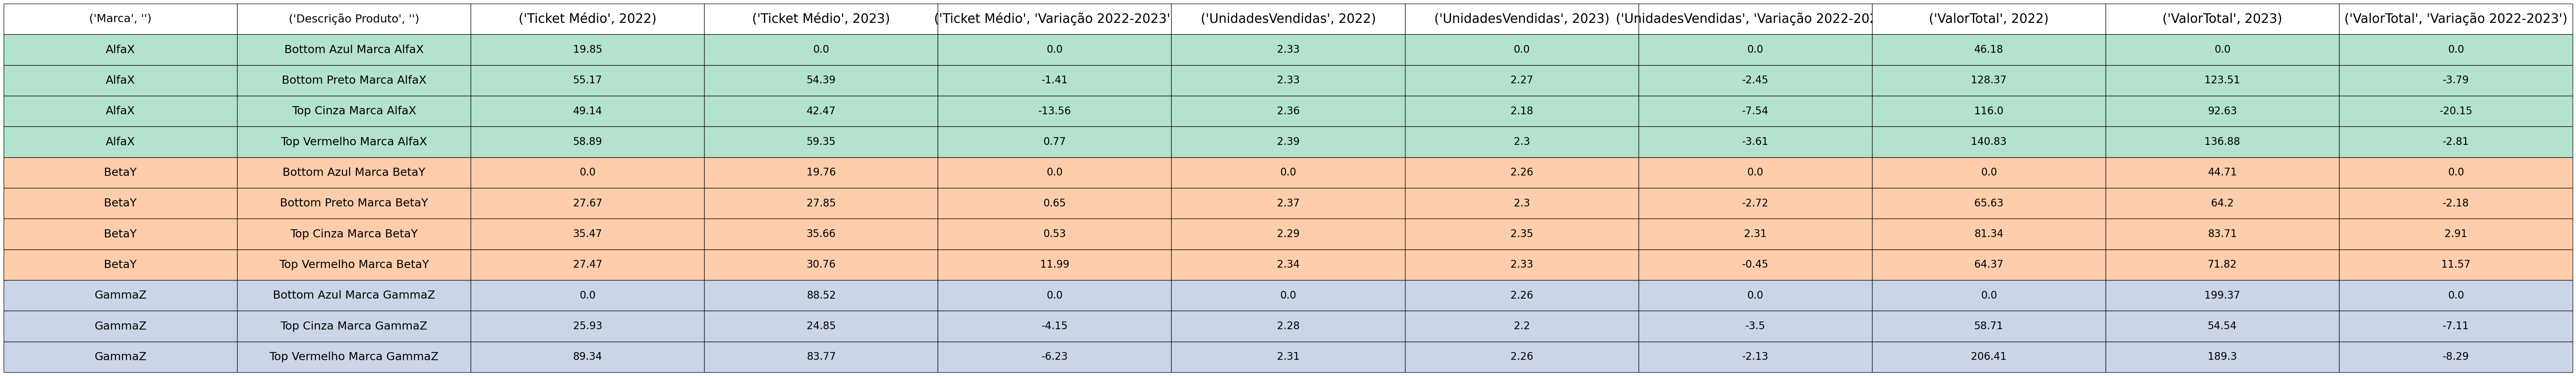

In [76]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

# pivot_df = df_tp.pivot_table(index=['Marca', 'Descrição Produto'], columns='Year', values=['Ticket Médio', 'ValorTotal', 'UnidadesVendidas'])

for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    pivot_df[(col, 'Variação 2022-2023')] = ((pivot_df[(col, 2023)] - pivot_df[(col, 2022)]) / pivot_df[(col, 2022)]) * 100

pivot_df = pivot_df.fillna(0)

pivot_df = pivot_df.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Defining the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Adding the table to the figure
table_data = pivot_df.reset_index().round(2).values.tolist()
column_labels = pivot_df.reset_index().columns.tolist()

# Get the Pastel2 colormap
colors = cm.get_cmap('Pastel2').colors  # This gets the RGBA values of the colors
colors = [cm.colors.to_hex(c) for c in colors]  # This converts the RGBA values to hexadecimal color codes

# Create a color dictionary for each 'Marca'
marca_colors = {marca: colors[i % len(colors)] for i, marca in enumerate(pivot_df.index.get_level_values('Marca').unique())}

# Create a color matrix based on 'Marca'
cell_colors = [[marca_colors[row[0]] for _ in row] for row in table_data]

# Adding the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Adjusting the font size
table.auto_set_font_size(False)
table.set_fontsize(20)  # Increase this value to make the text larger

# Increase the overall width and height of the table
table.scale(6, 5)  # Increase these values to increase the width and height of the columns

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(25)  # Increase this value to make the text larger

# Adjust the font size of 'Marca' and 'Descrição Produto' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:  # 0 and 1 are the indices of 'Marca' and 'Descrição Produto' columns
        cell.set_fontsize(22)  # Increase this value to make the text larger

# Hiding the axes
ax.axis('off')

# Saving the figure as .png
plt.savefig('pivot_df_table.png')

In [77]:
# liberando espaço na memória
# Get a dictionary of all variables in your current namespace
variables = locals()

# Convert the items to a list before iterating
for var_name, var_value in list(variables.items()):
    if isinstance(var_value, pd.DataFrame) and var_name != 'df_tp':
        del variables[var_name]

##### Quarta parte da análise:
- Clientes e Lojas

###### nesta quarta parte da análise é possível verificar que:

- As lojas 5(SP), 8(RS) e 2(MG) foram as que melhor performaram em relação a Ticket Médio no ano de 2023
- Para estas lojas a Classe B é a com maior Ticket Médio no ano de 2023 e o sexo feminino se destaca neste quesito
- nas faixas etárias há um diferença entre as lojas quando se trata de Ticket Médio no ano de 2023
loja 5 -> 18-25
loja 8 -> 25-35
loja 2 -> 45+
- as tabelas trazem detalhes que podem auxiliar em decisões futuras de MKT de froma mais detalhada

In [78]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Cliente
ws = wb['Cliente']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_c = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_c.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_c[col]):
        # Remova os espaços em branco no início e no final
        df_c[col] = df_c[col].str.strip()

In [79]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Cliente
ws = wb['Lojas']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_l = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_l.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_l[col]):
        # Remova os espaços em branco no início e no final
        df_l[col] = df_l[col].str.strip()

In [80]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID_Loja  10 non-null     int64 
 1   UF       10 non-null     object
 2   Regiao   8 non-null      object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [81]:
df_l

ID_Loja  UF        Regiao
0        1  AM         NORTE
1        2  MG  CENTRO-OESTE
2        3  SP       SUDESTE
3        4  SP          None
4        5  SP       SUDESTE
5        6  SP       SUDESTE
6        7  RS           SUL
7        8  RS           SUL
8        9  BH      NORDESTE
9       10  BH          None

In [82]:
# If 'Regiao' is None and 'UF' is 'SP', set 'Regiao' to 'SUDESTE'
df_l.loc[(df_l['Regiao'].isnull()) & (df_l['UF'] == 'SP'), 'Regiao'] = 'SUDESTE'

# If 'Regiao' is None and 'UF' is 'BH', set 'Regiao' to 'SUDESTE'
df_l.loc[(df_l['Regiao'].isnull()) & (df_l['UF'] == 'BH'), 'Regiao'] = 'SUDESTE'

In [83]:
df_l

ID_Loja  UF        Regiao
0        1  AM         NORTE
1        2  MG  CENTRO-OESTE
2        3  SP       SUDESTE
3        4  SP       SUDESTE
4        5  SP       SUDESTE
5        6  SP       SUDESTE
6        7  RS           SUL
7        8  RS           SUL
8        9  BH      NORDESTE
9       10  BH       SUDESTE

In [84]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    100 non-null    int64 
 1   Genero        93 non-null     object
 2   FaixaIdade    100 non-null    object
 3   ClasseSocial  100 non-null    object
 4   None          0 non-null      object
 5   None          0 non-null      object
 6   None          0 non-null      object
 7   None          0 non-null      object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [85]:
df_c = df_c.dropna(axis=1, how='all')
df_c[df_c['Genero'].isnull()]
for col in df_c.columns:
    print(f'Column: {col}')
    print(df_c[col].value_counts(dropna=False))

Column: CustomerID
CustomerID
90000    1
90063    1
90073    1
90072    1
90071    1
        ..
90030    1
90029    1
90028    1
90027    1
90099    1
Name: count, Length: 100, dtype: int64
Column: Genero
Genero
Feminino     64
Masculino    29
None          7
Name: count, dtype: int64
Column: FaixaIdade
FaixaIdade
25-35    50
35-45    30
18-25    11
45+       9
Name: count, dtype: int64
Column: ClasseSocial
ClasseSocial
C    52
D    15
B    12
A    11
E    10
Name: count, dtype: int64


In [86]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    100 non-null    int64 
 1   Genero        93 non-null     object
 2   FaixaIdade    100 non-null    object
 3   ClasseSocial  100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [87]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Trans           7791 non-null   int64         
 1   Data               7791 non-null   datetime64[ns]
 2   ID_Loja            7791 non-null   int64         
 3   ID_Produto         7791 non-null   int64         
 4   ID_Cliente         7791 non-null   int64         
 5   UnidadesVendidas   7791 non-null   int64         
 6   ValorTotal         7791 non-null   float64       
 7   Promo              7791 non-null   int32         
 8   Year               7791 non-null   int32         
 9   Month              7791 non-null   int32         
 10  Ticket Médio       7791 non-null   float64       
 11  Descrição Produto  7791 non-null   object        
 12  Categoria          7791 non-null   object        
 13  Cor                7791 non-null   object        
 14  Marca   

In [88]:
# Perform a left join of df_tp and df_l on the 'ID_Loja' column
df_merged = df_tp.merge(df_l, on='ID_Loja', how='left')

In [89]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Trans           7791 non-null   int64         
 1   Data               7791 non-null   datetime64[ns]
 2   ID_Loja            7791 non-null   int64         
 3   ID_Produto         7791 non-null   int64         
 4   ID_Cliente         7791 non-null   int64         
 5   UnidadesVendidas   7791 non-null   int64         
 6   ValorTotal         7791 non-null   float64       
 7   Promo              7791 non-null   int32         
 8   Year               7791 non-null   int32         
 9   Month              7791 non-null   int32         
 10  Ticket Médio       7791 non-null   float64       
 11  Descrição Produto  7791 non-null   object        
 12  Categoria          7791 non-null   object        
 13  Cor                7791 non-null   object        
 14  Marca   

In [90]:
# Perform a left join of df_merged and df_c on the 'ID_Cliente' and 'CustomerID' columns
df_final = df_merged.merge(df_c, left_on='ID_Cliente', right_on='CustomerID', how='left')

In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Trans           7791 non-null   int64         
 1   Data               7791 non-null   datetime64[ns]
 2   ID_Loja            7791 non-null   int64         
 3   ID_Produto         7791 non-null   int64         
 4   ID_Cliente         7791 non-null   int64         
 5   UnidadesVendidas   7791 non-null   int64         
 6   ValorTotal         7791 non-null   float64       
 7   Promo              7791 non-null   int32         
 8   Year               7791 non-null   int32         
 9   Month              7791 non-null   int32         
 10  Ticket Médio       7791 non-null   float64       
 11  Descrição Produto  7791 non-null   object        
 12  Categoria          7791 non-null   object        
 13  Cor                7791 non-null   object        
 14  Marca   

In [92]:
# liberando espaço na memória
# Get a dictionary of all variables in your current namespace
variables = locals()

# Convert the items to a list before iterating
for var_name, var_value in list(variables.items()):
    if isinstance(var_value, pd.DataFrame) and var_name != 'df_final':
        del variables[var_name]

In [93]:
# Group by 'ID_Loja' and 'Year' and calculate the mean of 'Ticket Médio', 'ValorTotal', and 'UnidadesVendidas'
df_grouped = df_final.groupby(['ID_Loja', 'Year']).agg({'Ticket Médio': 'mean', 'ValorTotal': 'sum', 'UnidadesVendidas': 'sum'})

# Rank 'ID_Loja' by 'Ticket Médio', 'ValorTotal', and 'UnidadesVendidas' for each year
df_grouped['Rank_Ticket_Medio'] = df_grouped.groupby('Year')['Ticket Médio'].rank(ascending=False)
df_grouped['Rank_ValorTotal'] = df_grouped.groupby('Year')['ValorTotal'].rank(ascending=False)
df_grouped['Rank_UnidadesVendidas'] = df_grouped.groupby('Year')['UnidadesVendidas'].rank(ascending=False)


In [94]:
# Sort df_grouped by 'ID_Loja', 'Year' and 'Rank_Ticket_Medio'
df_sorted = df_grouped.sort_values(by=['ID_Loja', 'Rank_Ticket_Medio', 'Year'])

# Print the sorted DataFrame
df_sorted

Ticket Médio  ValorTotal  UnidadesVendidas  Rank_Ticket_Medio  \
ID_Loja Year                                                                  
1       2022     47.247530  24933.3660               530                3.0   
        2023     53.186719  24882.2255               476                4.0   
2       2023     54.171854  54148.3405               997                3.0   
        2022     45.367873  46666.1960              1041               10.0   
3       2022     46.916761  51070.6560              1093                5.0   
        2023     52.052152  55391.3810              1062                7.0   
4       2022     47.407694  50145.1960              1054                2.0   
        2023     52.388917  50037.4375               965                5.0   
5       2023     54.538466  51742.8740               954                1.0   
        2022     46.310672  43168.7600               918                7.0   
6       2022     47.123065  46405.7300               988                4.0   
        2023     51.344825  48034.6020               948                9.0   
7       2022     46.600406  44117.2090               953                6.0   
        2023     50.345047  49530.2960               990               10.0   
8       2023     54.251672  54127.6185               993                2.0   
        2022     46.270479  42985.8100               936                8.0   
9       2022     47.551170  48692.5280              1006                1.0   
        2023     51.946690  53197.1210              1021                8.0   
10      2023     52.204931  26324.9065               496                6.0   
        2022     45.734077  23610.1010               519                9.0   

              Rank_ValorTotal  Rank_UnidadesVendidas  
ID_Loja Year                                          
1       2022              9.0                    9.0  
        2023             10.0                   10.0  
2       2023              2.0                    3.0  
        2022              4.0                    3.0  
3       2022              1.0                    1.0  
        2023              1.0                    1.0  
4       2022              2.0                    2.0  
        2023              6.0                    6.0  
5       2023              5.0                    7.0  
        2022              7.0                    8.0  
6       2022              5.0                    5.0  
        2023              8.0                    8.0  
7       2022              6.0                    6.0  
        2023              7.0                    5.0  
8       2023              3.0                    4.0  
        2022              8.0                    7.0  
9       2022              3.0                    4.0  
        2023              4.0                    2.0  
10      2023              9.0                    9.0  
        2022             10.0                   10.0

In [95]:
import plotly.graph_objects as go

# Reset the index
df_sorted_reset = df_sorted.reset_index()

# Create a color sequence similar to 'Pastel2'
color_sequence = ['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae']

# Get the 'ID_Loja' with the best rank in 2023
best_rank_id_loja_2023 = df_sorted_reset[(df_sorted_reset['Year'] == 2023) & (df_sorted_reset['Rank_Ticket_Medio'] == df_sorted_reset['Rank_Ticket_Medio'].min())]['ID_Loja'].values[0]

# Create a bar plot
fig = go.Figure()

for i, year in enumerate(df_sorted_reset['Year'].unique()):
    df_year = df_sorted_reset[df_sorted_reset['Year'] == year]
    fig.add_trace(go.Bar(
        x=df_year['ID_Loja'],
        y=df_year['Ticket Médio'],
        name=str(year),
        text=df_year['Rank_Ticket_Medio'],
        legendgroup=str(year),
        marker_color=[color_sequence[i % len(color_sequence)] if id_loja != best_rank_id_loja_2023 or year != 2023 else '#ff0000' for id_loja in df_year['ID_Loja']],  # Highlight the best rank in 2023
        hovertemplate='ID_Loja: %{x}<br>Ticket Médio: %{y}<br>Year: '+str(year)+'<br>Rank: %{text}<extra></extra>',
    ))

# Add title and set barmode to 'group'
fig.update_layout(title_text='Ticket Médio by ID_Loja and Year', barmode='group')

# Show the plot
fig.show()

In [96]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','Marca']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'Marca'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')
df_pivot_reindexed

Ticket Médio            UnidadesVendidas        ValorTotal  \
Year                   2022       2023             2022   2023       2022   
ID_Loja Marca                                                               
5       AlfaX     48.298856  51.919556            392.0  281.0  19386.719   
        BetaY     30.550208  30.193652            280.0  322.0   8470.860   
        GammaZ    62.043514  78.319247            246.0  351.0  15311.181   
8       AlfaX     48.455955  51.706533            336.0  267.0  16214.505   
        BetaY     30.425517  29.410358            346.0  345.0  10595.391   
        GammaZ    64.059239  78.407126            254.0  381.0  16175.914   
2       AlfaX     46.985413  52.375821            373.0  282.0  17278.751   
        BetaY     30.038618  30.325560            376.0  330.0  11273.118   
        GammaZ    62.598226  75.406337            292.0  385.0  18114.327   
1       AlfaX     48.757966  51.915592            201.0  161.0   9827.015   
        BetaY     30.313425  31.191597            183.0  173.0   5532.991   
        GammaZ    63.030129  78.433265            146.0  142.0   9573.360   
4       AlfaX     49.902427  51.353214            423.0  327.0  21087.803   
        BetaY     30.297239  29.890853            364.0  359.0  11042.411   
        GammaZ    67.300108  80.058471            267.0  279.0  18014.982   
10      AlfaX     48.031683  53.792261            185.0  169.0   8923.987   
        BetaY     29.750175  29.275407            195.0  159.0   5751.283   
        GammaZ    64.213881  74.007135            139.0  168.0   8934.831   
3       AlfaX     50.642645  50.089595            433.0  325.0  21849.151   
        BetaY     29.973844  29.887072            354.0  371.0  10626.515   
        GammaZ    60.938252  76.703998            306.0  366.0  18594.990   
9       AlfaX     50.239538  51.382169            380.0  315.0  19181.263   
        BetaY     29.728973  29.162800            304.0  345.0   8982.225   
        GammaZ    63.119262  73.818462            322.0  361.0  20529.040   
6       AlfaX     48.937641  51.914289            371.0  277.0  18118.974   
        BetaY     30.660355  29.875186            361.0  374.0  11166.066   
        GammaZ    67.053894  75.614248            256.0  297.0  17120.690   
7       AlfaX     49.349883  51.860462            370.0  296.0  18262.957   
        BetaY     30.708510  29.749969            346.0  364.0  10549.392   
        GammaZ    64.310491  71.384326            237.0  330.0  15304.860   

                            
Year                  2023  
ID_Loja Marca               
5       AlfaX   14665.9730  
        BetaY    9722.6115  
        GammaZ  27354.2895  
8       AlfaX   13774.6700  
        BetaY   10161.7525  
        GammaZ  30191.1960  
2       AlfaX   14766.2600  
        BetaY   10116.9280  
        GammaZ  29265.1525  
1       AlfaX    8351.0760  
        BetaY    5313.5580  
        GammaZ  11217.5915  
4       AlfaX   16852.0600  
        BetaY   10803.6145  
        GammaZ  22381.7630  
10      AlfaX    9121.3160  
        BetaY    4638.9740  
        GammaZ  12564.6165  
3       AlfaX   16237.2120  
        BetaY   11242.5300  
        GammaZ  27911.6390  
9       AlfaX   16290.0740  
        BetaY    9900.8580  
        GammaZ  27006.1890  
6       AlfaX   14485.0965  
        BetaY   11194.9255  
        GammaZ  22354.5800  
7       AlfaX   15475.5260  
        BetaY   10923.2990  
        GammaZ  23131.4710

In [97]:
df_pivot_reindexed.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, (5, 'AlfaX') to (7, 'GammaZ')
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Ticket Médio, 2022)      30 non-null     float64
 1   (Ticket Médio, 2023)      30 non-null     float64
 2   (UnidadesVendidas, 2022)  30 non-null     float64
 3   (UnidadesVendidas, 2023)  30 non-null     float64
 4   (ValorTotal, 2022)        30 non-null     float64
 5   (ValorTotal, 2023)        30 non-null     float64
dtypes: float64(6)
memory usage: 2.0+ KB


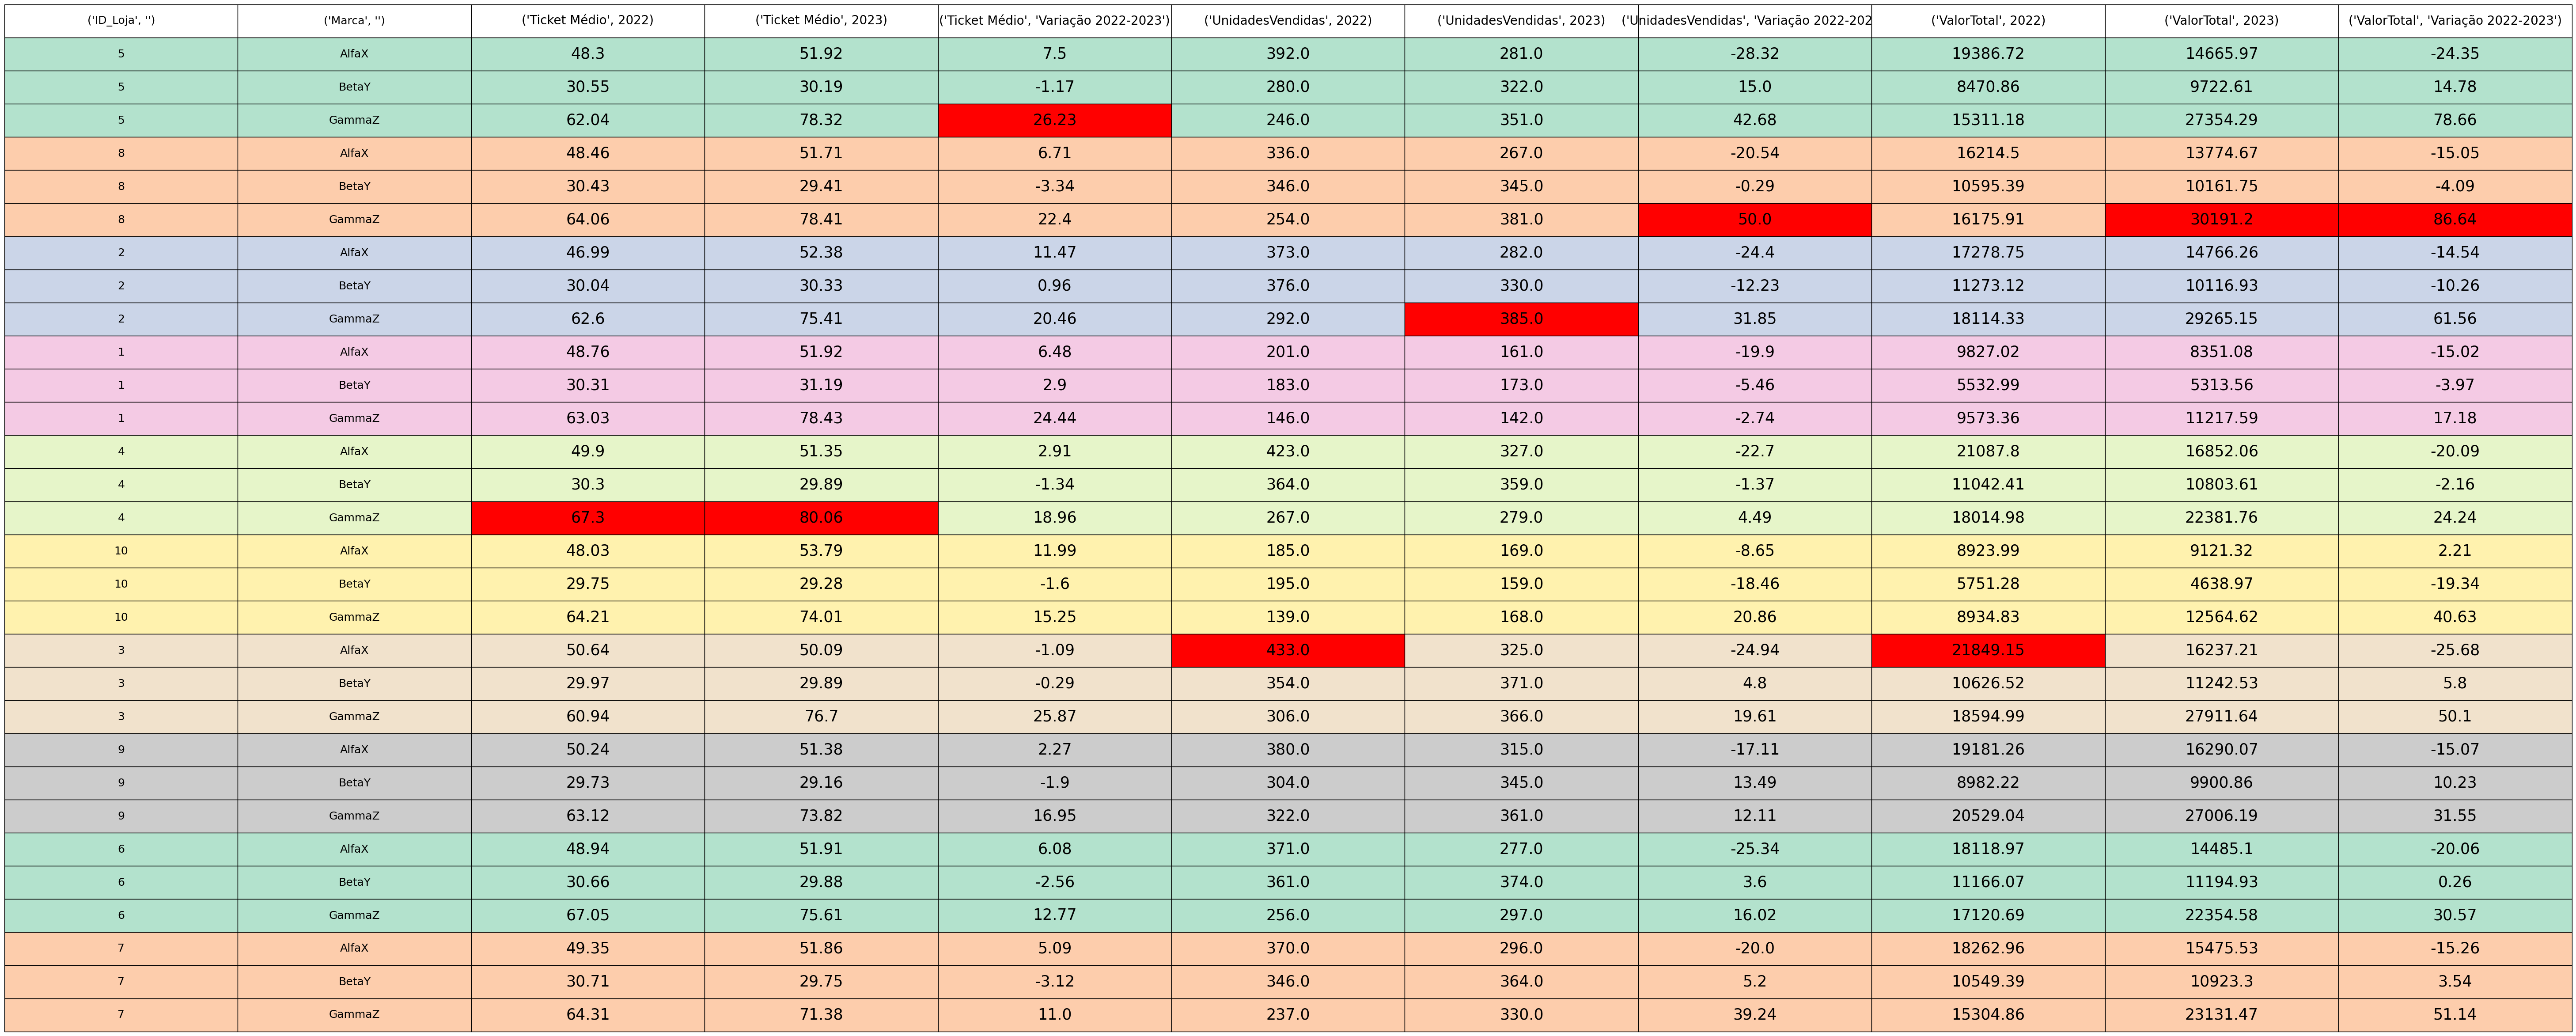

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'Marca' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')

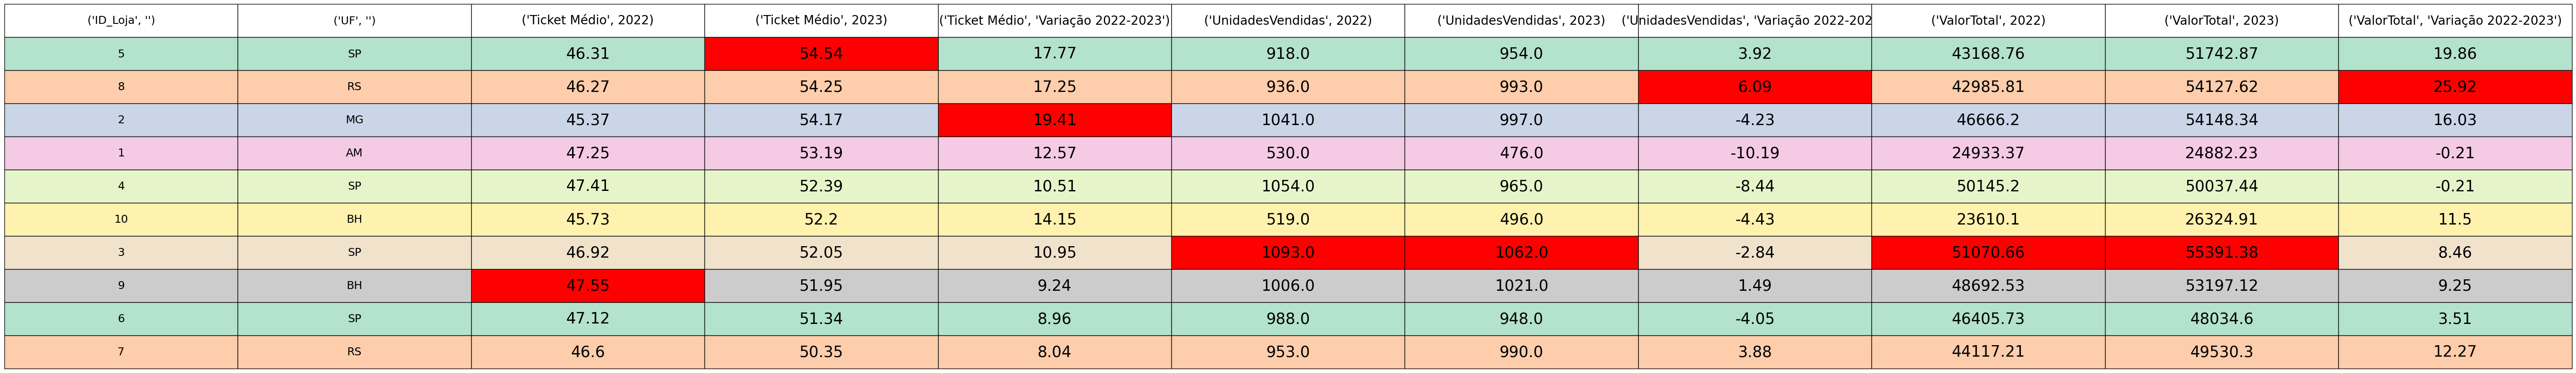

In [99]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','UF']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'UF'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'UF' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



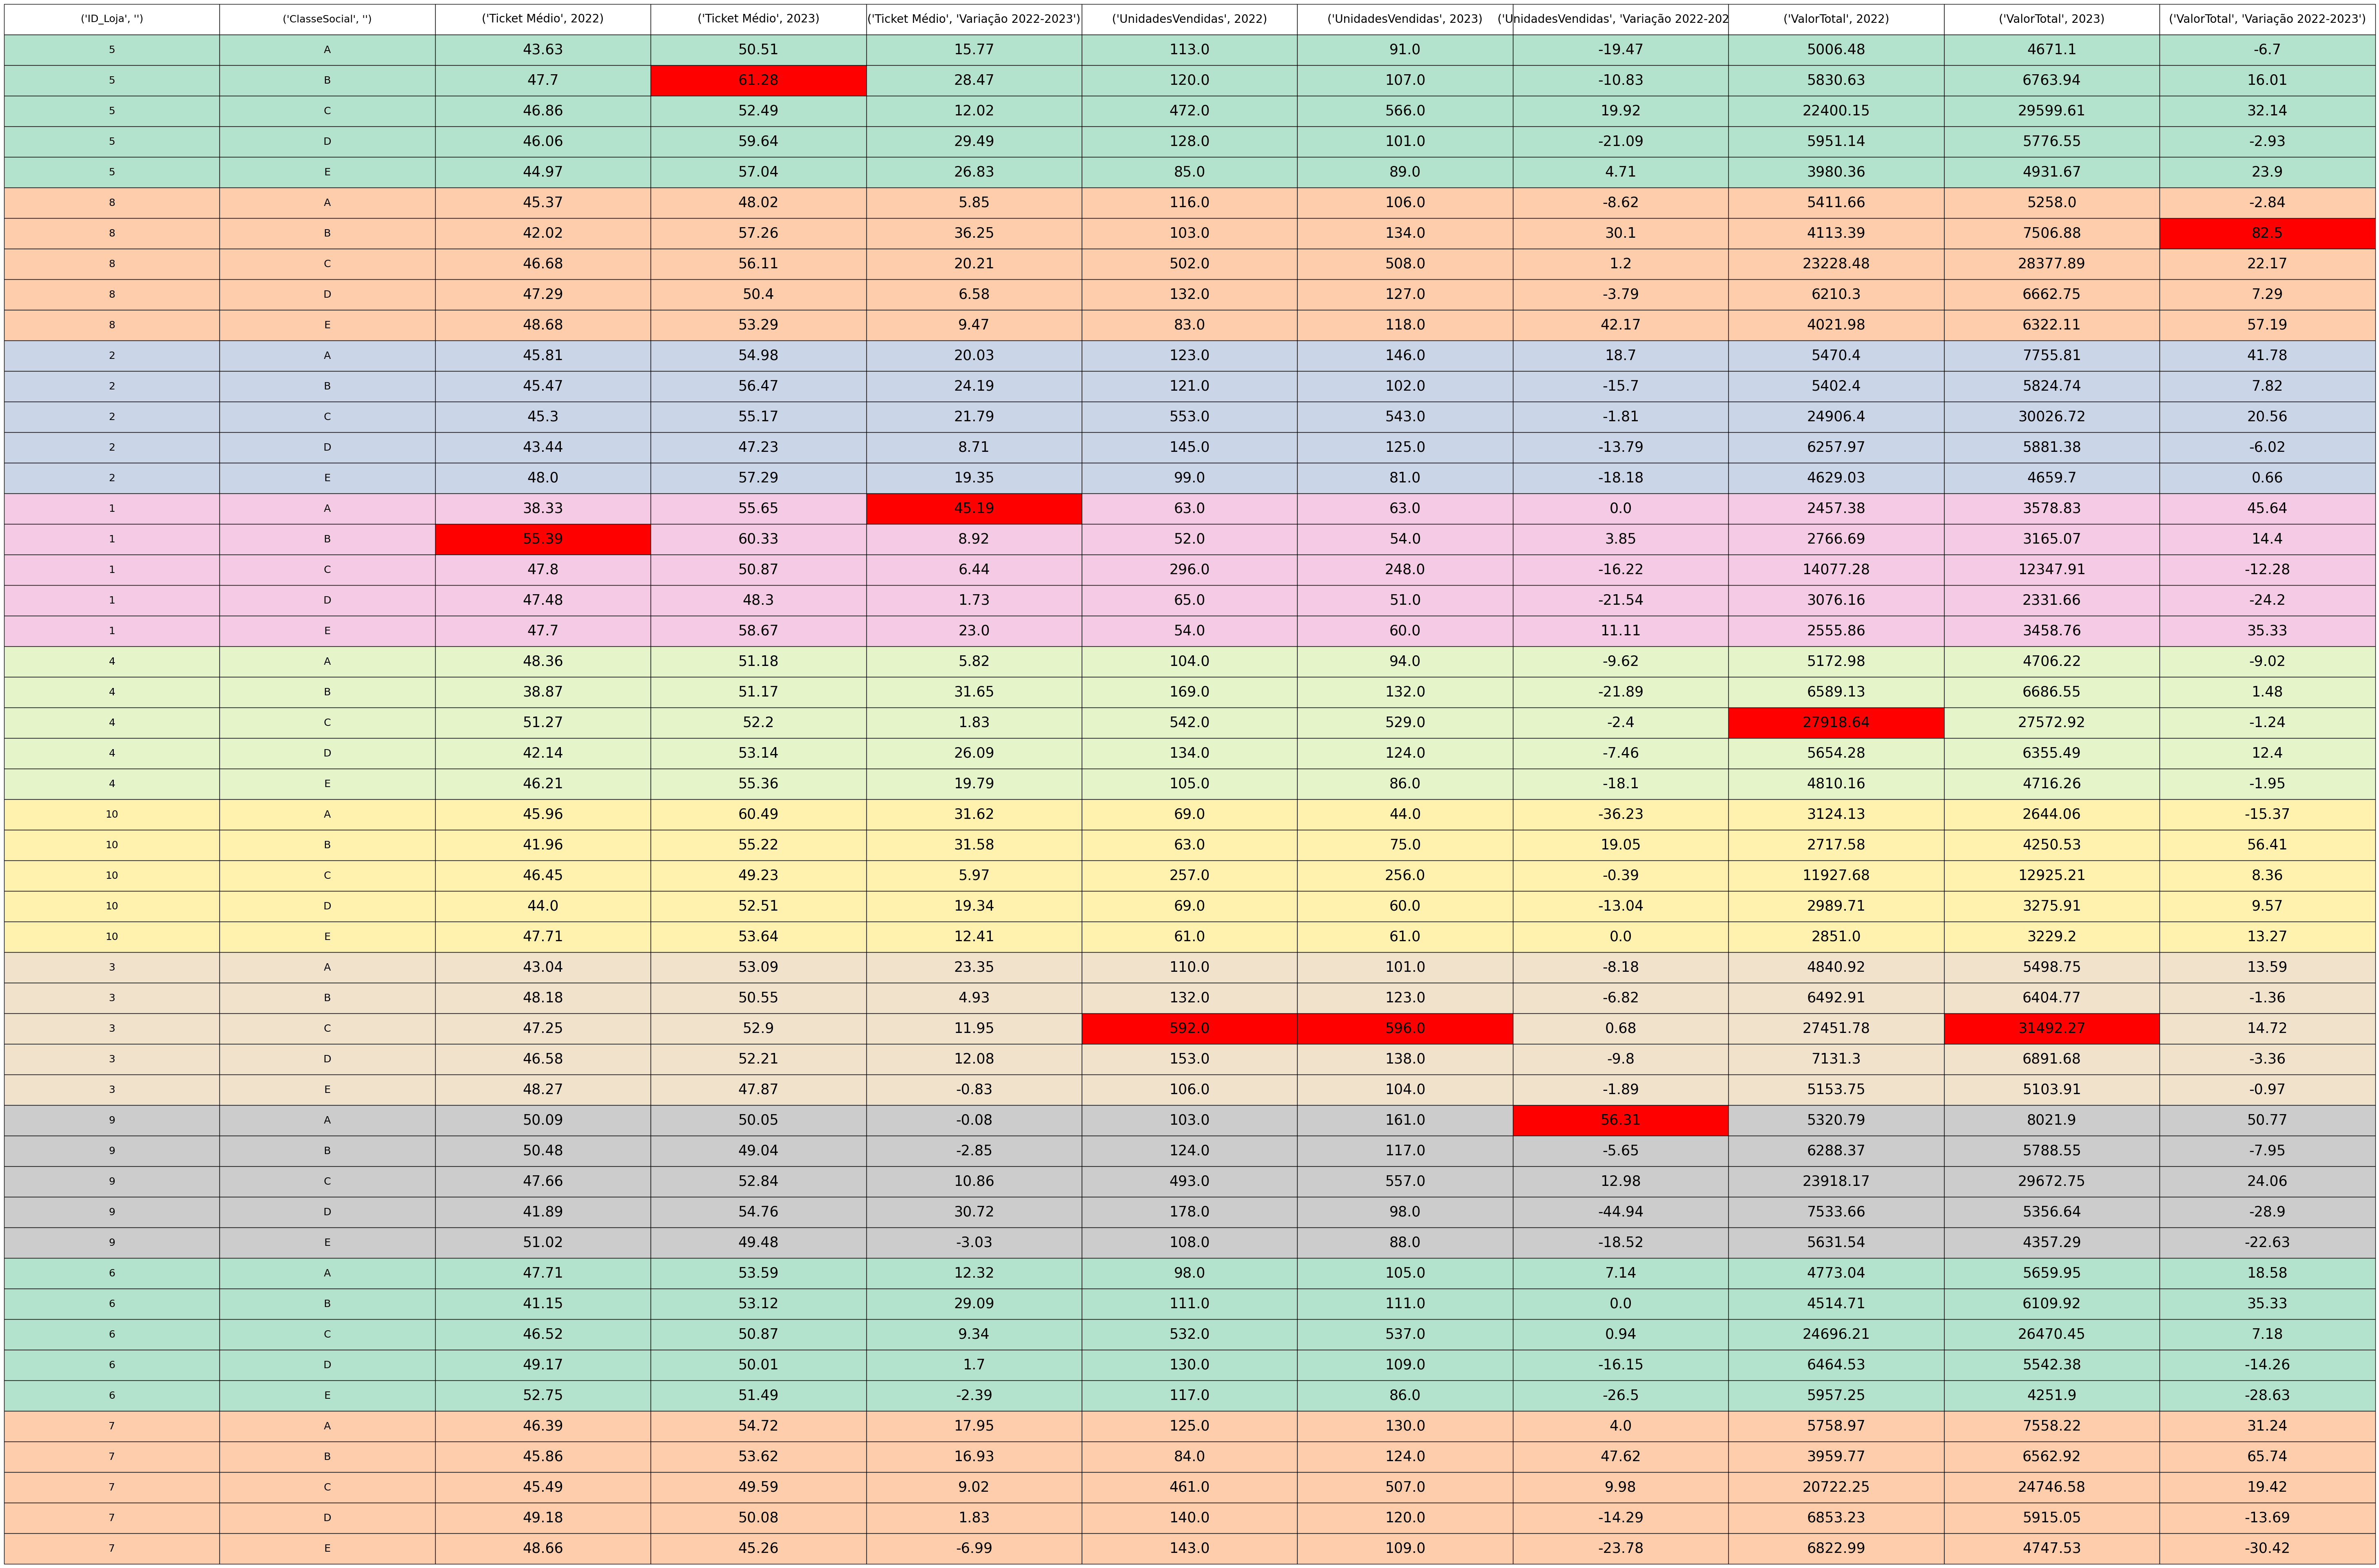

In [100]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','ClasseSocial']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'ClasseSocial'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'ClasseSocial' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



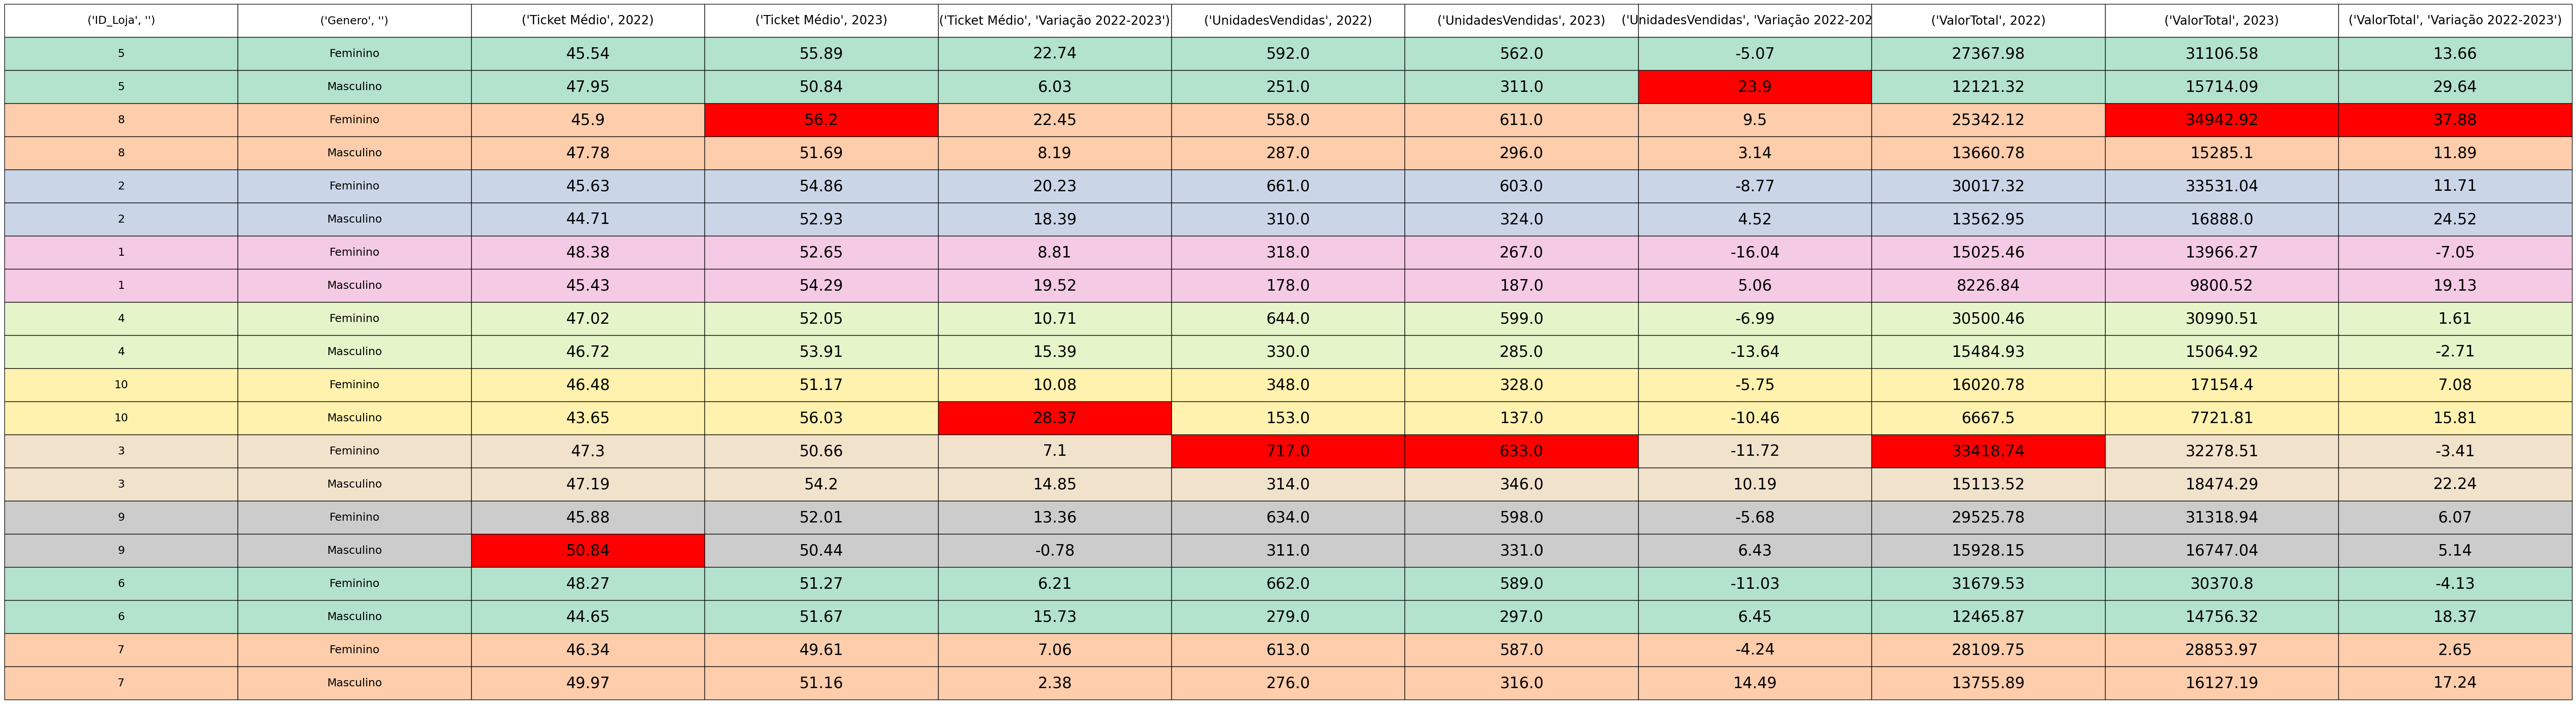

In [101]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','Genero']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'Genero'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'Genero' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



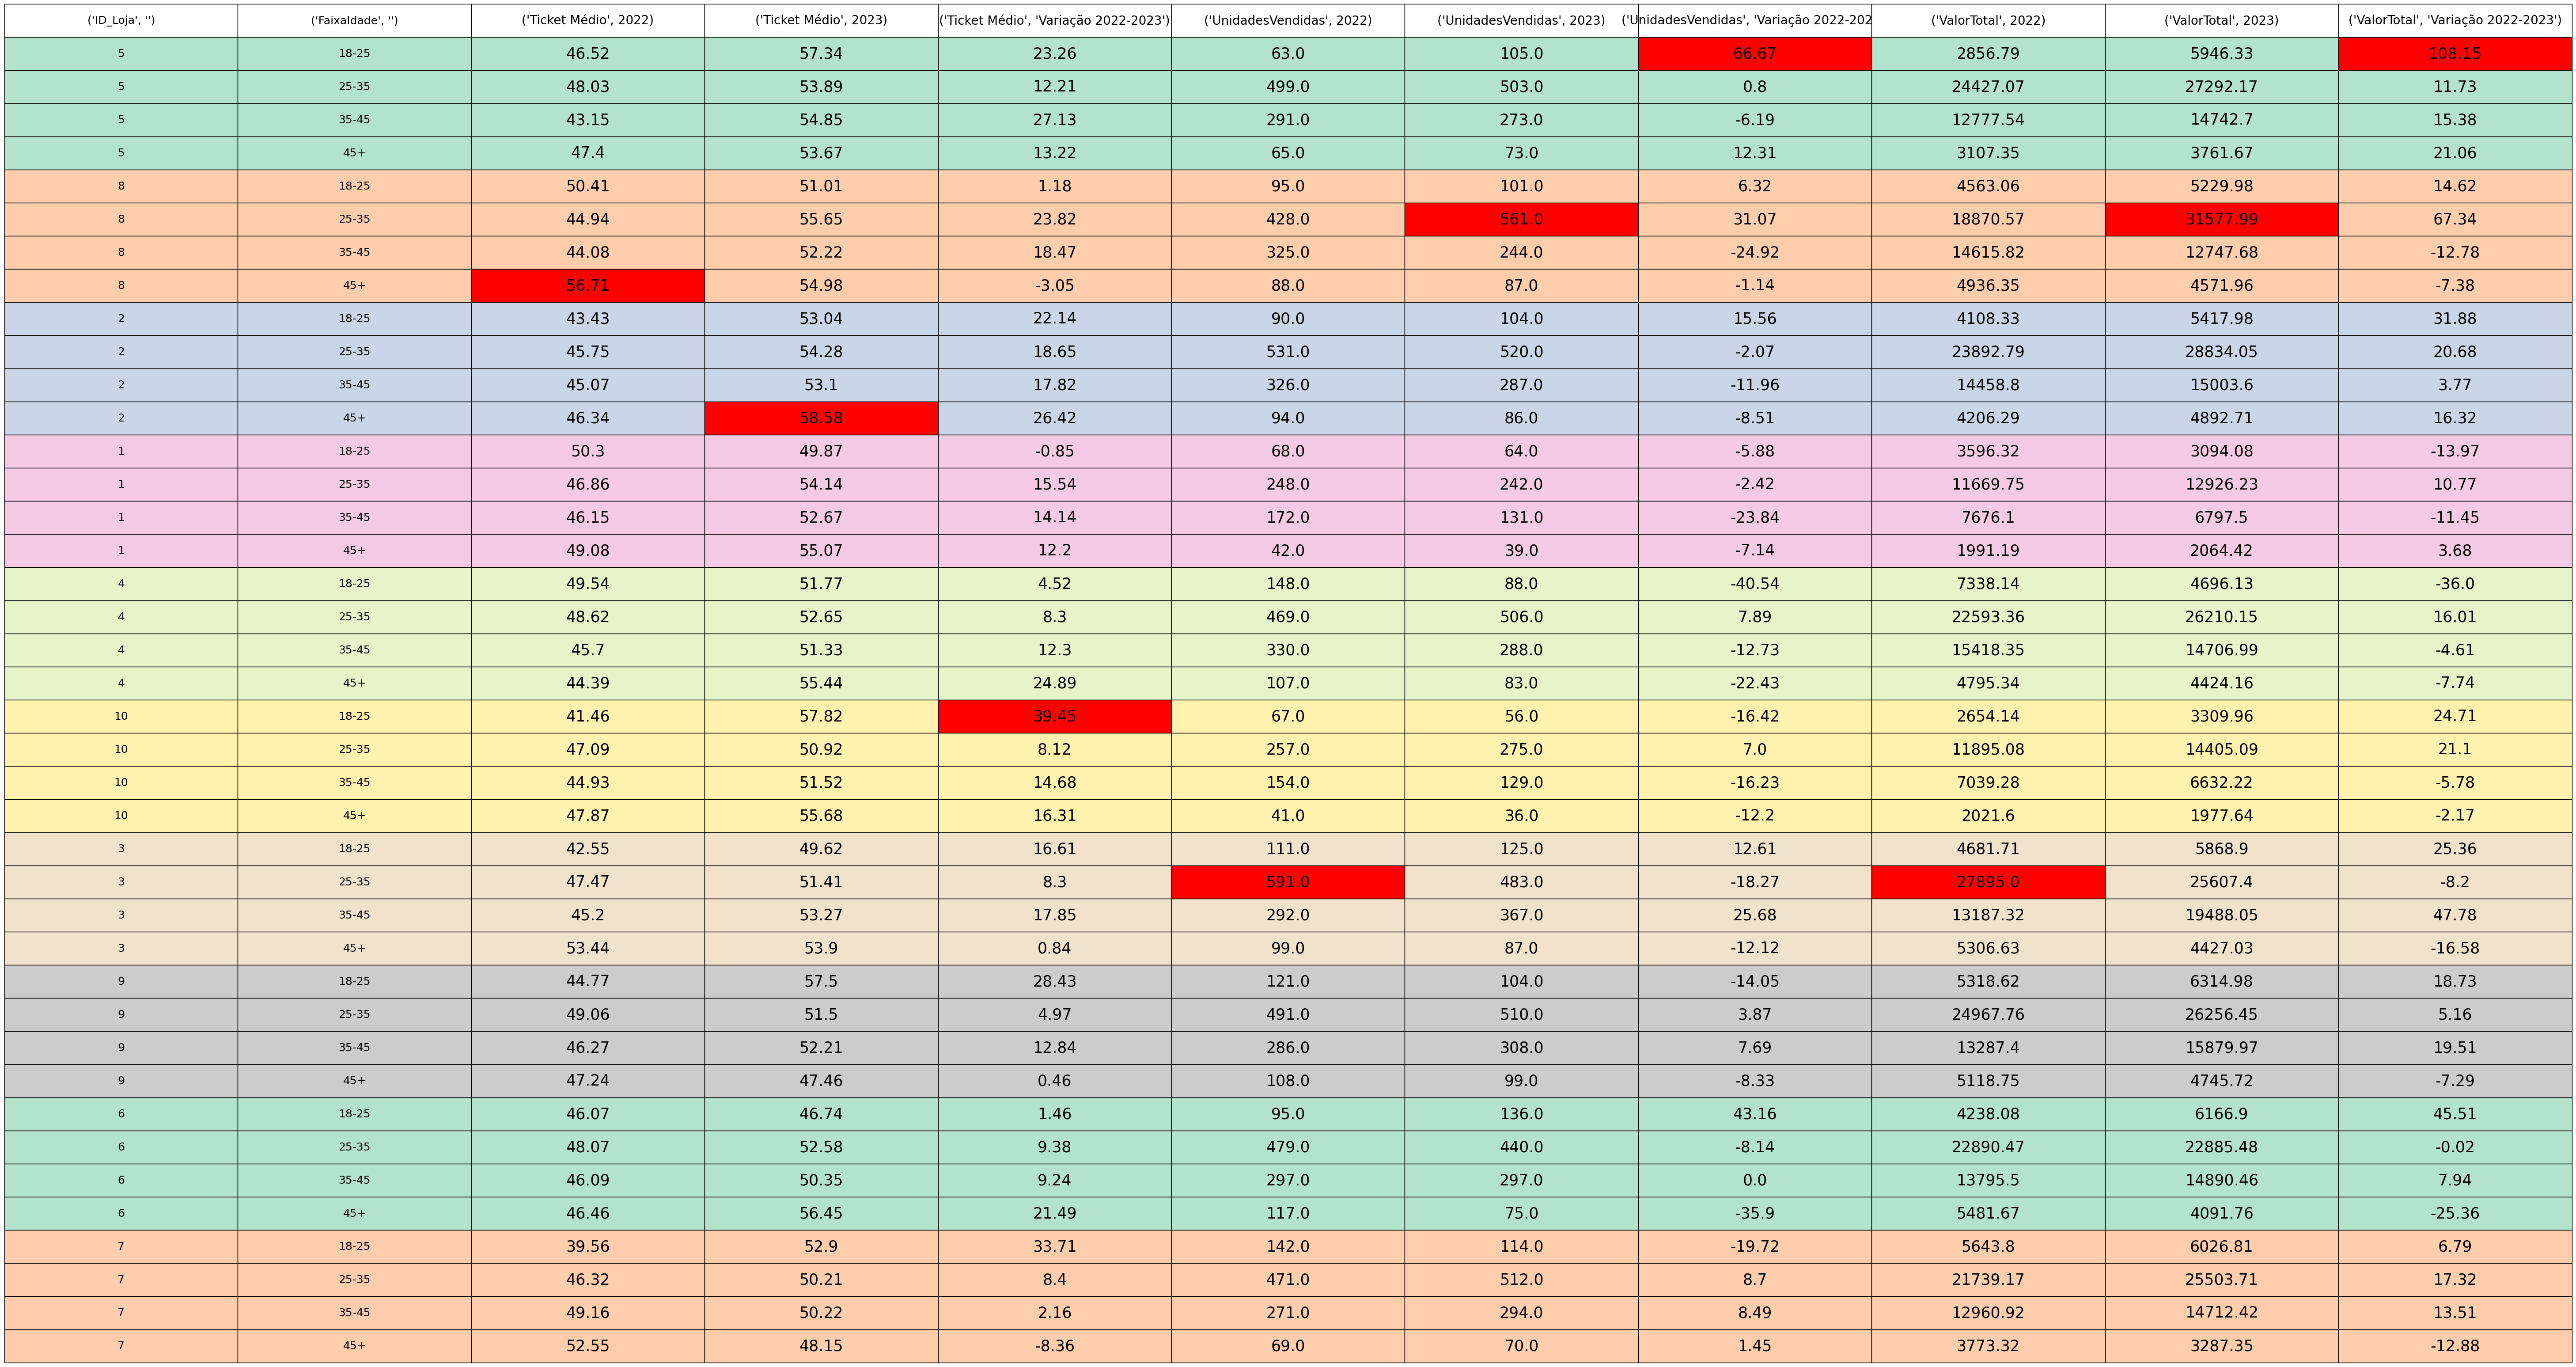

In [102]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','FaixaIdade']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'FaixaIdade'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = 'red'  # Change 'red' to any color you want

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'FaixaIdade' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



##### Quinta parte da análise:
- Teste

###### nesta quinta parte da análise é possível verificar que:
O valor de p é 0,185 ou 18,5%. Um valor de p menor que 0,05 geralmente é considerado evidência forte o suficiente para rejeitar a hipótese nula e aceitar a hipótese alternativa.

- H0 (Hipótese nula): O teste não rejeita a hipótese nula pois não há associação significativa entre "Grupo" e "Comprou". Em outras palavras, a taxa de compra é praticamente a mesma para os grupos 'CONTROLE' e 'TESTE'.

- H1 (Hipótese alternativa): O Teste rejeita hipótese alternativa que seria uma associação significativa entre "Grupo" e "Comprou".

Portanto não houve diferença significativa entre o Modelo ANTIGO e NOVO de disparo de e-mails.



Em testes de hipóteses, temos duas hipóteses principais:

- H0 (Hipótese nula): Esta é a hipótese que assumimos ser verdadeira antes de coletar e analisar os dados. No seu caso, a hipótese nula é que não há associação significativa entre "Grupo" e "Comprou". Em outras palavras, a taxa de compra é a mesma para os grupos 'CONTROLE' e 'TESTE'.

- H1 (Hipótese alternativa): Esta é a hipótese que queremos testar contra a hipótese nula. No seu caso, a hipótese alternativa é que há uma associação significativa entre "Grupo" e "Comprou". Ou seja, a taxa de compra é diferente para os grupos 'CONTROLE' e 'TESTE'.

O valor de p é a probabilidade de obter os resultados que você obteve (ou resultados mais extremos) se a hipótese nula for verdadeira. Um valor de p menor que 0,05 geralmente é considerado evidência forte o suficiente para rejeitar a hipótese nula e aceitar a hipótese alternativa.

No seu caso, o valor de p é 0,185, que é maior que 0,05. Isso significa que, se a hipótese nula for verdadeira (ou seja, se não houver associação significativa entre "Grupo" e "Comprou"), há uma probabilidade de 18,5% de obter os resultados que você obteve (ou resultados mais extremos). Portanto, você não rejeita a hipótese nula e conclui que não tem evidências suficientes para afirmar que há uma associação significativa entre "Grupo" e "Comprou".

Claro, vamos detalhar um pouco mais.

O valor de p, ou valor-p, é uma medida usada em estatística para ajudar a decidir se os resultados de um teste são significativos ou não. Especificamente, o valor-p é a probabilidade de obter um resultado tão extremo quanto o observado, assumindo que a hipótese nula é verdadeira.

No seu caso, o valor de p é 0,185, ou 18,5%. Isso significa que, se a hipótese nula for verdadeira (ou seja, se não houver diferença real na taxa de compra entre os grupos 'CONTROLE' e 'TESTE'), você ainda esperaria ver uma diferença tão grande quanto a que você observou (ou maior) em 18,5% das vezes que você repetisse o experimento.

Em outras palavras, mesmo que não haja diferença real, você veria uma diferença como essa (ou maior) puramente por acaso em cerca de 18,5% das vezes.

Como esse valor de p é maior que o limite comum de significância de 0,05, você não rejeita a hipótese nula. Isso significa que você não tem evidências suficientes para concluir que há uma diferença significativa na taxa de compra entre os grupos 'CONTROLE' e 'TESTE'.

In [103]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Cliente
ws = wb['Cliente']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_c = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_c.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_c[col]):
        # Remova os espaços em branco no início e no final
        df_c[col] = df_c[col].str.strip()

In [104]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('D:/OneDrive/Python Scripts/BDS_desafio_CRM/Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Teste
ws = wb['Teste']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_tst = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_tst.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_tst[col]):
        # Remova os espaços em branco no início e no final
        df_tst[col] = df_tst[col].str.strip()

In [105]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    100 non-null    int64 
 1   Genero        93 non-null     object
 2   FaixaIdade    100 non-null    object
 3   ClasseSocial  100 non-null    object
 4   None          0 non-null      object
 5   None          0 non-null      object
 6   None          0 non-null      object
 7   None          0 non-null      object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [106]:
df_c = df_c.dropna(axis=1, how='all')

In [107]:
df_c[df_c['Genero'].isnull()]

CustomerID Genero FaixaIdade ClasseSocial
14       90014   None      25-35            D
18       90018   None      25-35            C
52       90052   None      25-35            C
53       90053   None      35-45            C
73       90073   None      35-45            A
80       90080   None      25-35            E
98       90098   None      25-35            C

In [108]:
for col in df_c.columns:
    print(f'Column: {col}')
    print(df_c[col].value_counts(dropna=False))

Column: CustomerID
CustomerID
90000    1
90063    1
90073    1
90072    1
90071    1
        ..
90030    1
90029    1
90028    1
90027    1
90099    1
Name: count, Length: 100, dtype: int64
Column: Genero
Genero
Feminino     64
Masculino    29
None          7
Name: count, dtype: int64
Column: FaixaIdade
FaixaIdade
25-35    50
35-45    30
18-25    11
45+       9
Name: count, dtype: int64
Column: ClasseSocial
ClasseSocial
C    52
D    15
B    12
A    11
E    10
Name: count, dtype: int64


In [109]:
df_tst.head(10)

CustomerID     Grupo  Enviado  Recebido  Aberto  Sessao  Comprou
0       90000     TESTE        1         1       1       1        1
1       90001     TESTE        1         1       0       0        0
2       90002  CONTROLE        1         1       0       0        0
3       90003     TESTE        1         1       1       1        1
4       90004     TESTE        1         1       1       1        1
5       90005     TESTE        1         1       1       1        0
6       90006     TESTE        1         1       0       0        0
7       90007  CONTROLE        1         1       1       1        1
8       90008     TESTE        1         1       1       1        1
9       90009     TESTE        1         1       1       1        1

In [110]:
non_conforming_rows = df_tst.loc[
    ((df_tst['Enviado'] == 0) & (df_tst['Aberto'] != 0)) |
    ((df_tst['Enviado'] == 0) & (df_tst['Sessao'] != 0)) |
    ((df_tst['Recebido'] == 0) & (df_tst['Aberto'] != 0)) |
    ((df_tst['Aberto'] == 0) & (df_tst['Sessao'] != 0))
]

In [111]:
non_conforming_rows

CustomerID     Grupo  Enviado  Recebido  Aberto  Sessao  Comprou
89       90089  CONTROLE        0         1       1       1        0
93       90093     TESTE        0         1       1       1        1

In [112]:
df_tst = df_tst.drop(non_conforming_rows.index)

In [113]:
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  98 non-null     int64 
 1   Grupo       98 non-null     object
 2   Enviado     98 non-null     int64 
 3   Recebido    98 non-null     int64 
 4   Aberto      98 non-null     int64 
 5   Sessao      98 non-null     int64 
 6   Comprou     98 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 6.1+ KB


In [114]:
df_merged = df_tst.merge(df_c, on='CustomerID', how='left')

In [115]:
df_merged

CustomerID     Grupo  Enviado  Recebido  Aberto  Sessao  Comprou  \
0        90000     TESTE        1         1       1       1        1   
1        90001     TESTE        1         1       0       0        0   
2        90002  CONTROLE        1         1       0       0        0   
3        90003     TESTE        1         1       1       1        1   
4        90004     TESTE        1         1       1       1        1   
..         ...       ...      ...       ...     ...     ...      ...   
93       90095     TESTE        1         1       0       0        0   
94       90096  CONTROLE        1         1       1       1        1   
95       90097  CONTROLE        1         1       0       0        0   
96       90098     TESTE        1         1       1       1        1   
97       90099  CONTROLE        1         1       1       1        1   

       Genero FaixaIdade ClasseSocial  
0    Feminino      35-45            C  
1    Feminino        45+            D  
2    Feminino      18-25            C  
3    Feminino        45+            C  
4    Feminino      35-45            C  
..        ...        ...          ...  
93  Masculino      18-25            C  
94  Masculino      18-25            A  
95  Masculino        45+            C  
96       None      25-35            C  
97   Feminino      25-35            E  

[98 rows x 10 columns]

In [116]:
# Group by 'Grupo' and calculate the mean of 'Comprou'
conversion_rate = df_merged.groupby('Grupo')['Comprou'].mean()

conversion_rate

Grupo
CONTROLE    0.584906
TESTE       0.733333
Name: Comprou, dtype: float64

In [117]:
# Reset the index of the conversion_rate Series to convert it into a DataFrame
cr = conversion_rate.reset_index()

# Rename the columns
cr.columns = ['Grupo', 'conversion_rate']
cr

Grupo  conversion_rate
0  CONTROLE         0.584906
1     TESTE         0.733333

In [118]:
# Group by 'Grupo' and calculate the mean of 'Aberto'
opening_rate = df_merged.groupby('Grupo')['Aberto'].mean()

print(opening_rate)

Grupo
CONTROLE    0.867925
TESTE       0.911111
Name: Aberto, dtype: float64


In [119]:
o_r = opening_rate.reset_index()

# Rename the columns
o_r.columns = ['Grupo', 'opening_rate']
o_r

Grupo  opening_rate
0  CONTROLE      0.867925
1     TESTE      0.911111

In [120]:
# Assuming o_r is a DataFrame with a 'Grupo' column
merged_df = cr.merge(o_r, on='Grupo')
merged_df['conversion_rate'] = ((merged_df['conversion_rate'] * 100).round(2)).astype(str) + '%'
merged_df['opening_rate'] = ((merged_df['opening_rate'] * 100).round(2)).astype(str) + '%'

print(merged_df)

      Grupo conversion_rate opening_rate
0  CONTROLE          58.49%       86.79%
1     TESTE          73.33%       91.11%


In [121]:
merged_df

Grupo conversion_rate opening_rate
0  CONTROLE          58.49%       86.79%
1     TESTE          73.33%       91.11%

In [122]:
import statsmodels.api as sm
from scipy import stats

# Criando a tabela de contingência
tabela_contingencia = pd.crosstab(df_merged['Grupo'], df_merged['Comprou'])

# Realizando o teste
chi2, p, df, expected = stats.chi2_contingency(tabela_contingencia)

# Imprimindo os resultados
print("Valor de p:", p)

# Se p < 0.05, há significância estatística
if p < 0.05:
    print("Existe relação significativa entre Grupo e Comprou")
else:
    print("Não há relação significativa entre Grupo e Comprou")


Valor de p: 0.1850463335809991
Não há relação significativa entre Grupo e Comprou


In [123]:
from scipy.stats import chi2_contingency

# Filter the dataframe for 'CONTROLE' and 'TESTE' groups
df_controle = df_merged[df_merged['Grupo'] == 'CONTROLE']
df_teste = df_merged[df_merged['Grupo'] == 'TESTE']

# Create contingency tables
contingency_table_controle = pd.crosstab(df_controle['Grupo'], df_controle['Comprou'])
contingency_table_teste = pd.crosstab(df_teste['Grupo'], df_teste['Comprou'])

# Perform Chi-Square test for 'CONTROLE' group
chi2_controle, p_controle, dof_controle, expected_controle = chi2_contingency(contingency_table_controle)

# Perform Chi-Square test for 'TESTE' group
chi2_teste, p_teste, dof_teste, expected_teste = chi2_contingency(contingency_table_teste)

#print(f"Chi-square statistic for 'CONTROLE' group: {chi2_controle}")
print(f"P-value for 'CONTROLE' group: {p_controle}")

# print(f"Chi-square statistic for 'TESTE' group: {chi2_teste}")
print(f"P-value for 'TESTE' group: {p_teste}")

P-value for 'CONTROLE' group: 1.0
P-value for 'TESTE' group: 1.0


In [124]:
from scipy.stats import fisher_exact

# Create contingency table
contingency_table = pd.crosstab(df_merged['Grupo'], df_merged['Comprou'])

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")


# Se p < 0.05, há significância estatística
if p < 0.05:
    print("Existe relação significativa entre Grupo e Comprou")
else:
    print("Não há relação significativa entre Grupo e Comprou")


P-value: 0.1409815141818997
Não há relação significativa entre Grupo e Comprou
